In [2]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm, skew, kurtosis, zscore, shapiro

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

#Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#change directory for your path
os.chdir('E:\\OneDrive\\Documents\\GitHub\\eHealthEquity\\Research\\Data Source')

# Import
Data import and columns for analysis

In [4]:
df = pd.read_csv('acs5y_2021_brfss_2021_merged.csv')

index_list = [
    'state','county'
]
brfss_list = [col for col in df.columns if col.startswith('brfss_') and not col.endswith('crdprv')]
acs_list = [col for col in df.columns if col.startswith('pct_')]

all_columns = index_list + brfss_list + acs_list

df = df[all_columns]

In [5]:
df.head()

state          county  brfss_access2_ageadjprv  brfss_checkup_ageadjprv  \
0  Alaska  Aleutians East                     16.9                     60.7   
1  Alaska  Aleutians West                     13.7                     61.6   
2  Alaska       Anchorage                     10.4                     62.9   
3  Alaska          Bethel                     19.2                     62.6   
4  Alaska     Bristol Bay                     10.3                     61.4   

   brfss_csmoking_ageadjprv  brfss_depression_ageadjprv  \
0                      18.6                        13.1   
1                      15.5                        13.4   
2                      14.9                        19.5   
3                      35.4                        21.2   
4                      18.7                        18.8   

   brfss_diabetes_ageadjprv  brfss_ghlth_ageadjprv  brfss_mhlth_ageadjprv  \
0                      12.6                   19.1                   12.9   
1                      10.9                   15.3                   12.2   
2                       7.8                   13.5                   14.5   
3                      15.9                   30.0                   21.4   
4                       8.6                   14.4                   15.4   

   brfss_obesity_ageadjprv  brfss_access2_ageadjprv_lower  \
0                     31.3                           13.8   
1                     30.3                           11.5   
2                     32.9                            8.5   
3                     43.1                           15.2   
4                     35.6                            8.4   

   brfss_access2_ageadjprv_upper  brfss_access2_crdprv_lower  \
0                           20.3                        13.4   
1                           16.2                        11.2   
2                           12.7                         8.5   
3                           23.4                        15.0   
4                           12.4                         8.1   

   brfss_access2_crdprv_upper  brfss_checkup_ageadjprv_lower  \
0                        19.6                           54.6   
1                        15.9                           56.2   
2                        12.6                           58.9   
3                        23.5                           57.1   
4                        11.8                           55.4   

   brfss_checkup_ageadjprv_upper  brfss_checkup_crdprv_lower  \
0                           66.8                        54.5   
1                           67.9                        55.1   
2                           66.6                        58.7   
3                           67.6                        55.7   
4                           66.9                        58.4   

   brfss_checkup_crdprv_upper  brfss_csmoking_ageadjprv_lower  \
0                        66.8                            15.6   
1                        67.1                            13.0   
2                        66.4                            12.3   
3                        66.4                            29.9   
4                        69.5                            15.3   

   brfss_csmoking_ageadjprv_upper  brfss_csmoking_crdprv_lower  \
0                            22.3                         16.1   
1                            18.5                         14.0   
2                            17.7                         12.4   
3                            40.7                         29.7   
4                            22.1                         15.5   

   brfss_csmoking_crdprv_upper  brfss_depression_ageadjprv_lower  \
0                         23.1                              10.6   
1                         19.9                              11.1   
2                         17.7                              17.1   
3                         40.7                              17.7   
4                         22.3                              1

In [6]:
df.dtypes

state                                object
county                               object
brfss_access2_ageadjprv             float64
brfss_checkup_ageadjprv             float64
brfss_csmoking_ageadjprv            float64
brfss_depression_ageadjprv          float64
brfss_diabetes_ageadjprv            float64
brfss_ghlth_ageadjprv               float64
brfss_mhlth_ageadjprv               float64
brfss_obesity_ageadjprv             float64
brfss_access2_ageadjprv_lower       float64
brfss_access2_ageadjprv_upper       float64
brfss_access2_crdprv_lower          float64
brfss_access2_crdprv_upper          float64
brfss_checkup_ageadjprv_lower       float64
brfss_checkup_ageadjprv_upper       float64
brfss_checkup_crdprv_lower          float64
brfss_checkup_crdprv_upper          float64
brfss_csmoking_ageadjprv_lower      float64
brfss_csmoking_ageadjprv_upper      float64
brfss_csmoking_crdprv_lower         float64
brfss_csmoking_crdprv_upper         float64
brfss_depression_ageadjprv_lower

# Exploratory Data Analysis
1. Descriptive Statistics
2. Visualization
3. Preprocessing
4. Transformation

In [7]:
print("Number of Counties and Total Features with CI", df.shape)

Number of Counties and Total Features with CI (3076, 72)


## Feature list with CI

In [8]:
columns_list = df.columns.tolist()
features = []
upper_lower_CI = []

for feature in columns_list:
    if feature.endswith('_lower') or feature.endswith('_upper'):
        continue
    
    upper_ci = feature + '_upper' if feature + '_upper' in columns_list else None
    lower_ci = feature + '_lower' if feature + '_lower' in columns_list else None
    
    features.append(feature)
    upper_lower_CI.append((upper_ci, lower_ci))

df_features = pd.DataFrame({
    'Features': features,
    'upper_lower_CI': upper_lower_CI
})

display(df_features)
#drop county and state from features list
features = features[2:]

Features  \
0                        state   
1                       county   
2      brfss_access2_ageadjprv   
3      brfss_checkup_ageadjprv   
4     brfss_csmoking_ageadjprv   
5   brfss_depression_ageadjprv   
6     brfss_diabetes_ageadjprv   
7        brfss_ghlth_ageadjprv   
8        brfss_mhlth_ageadjprv   
9      brfss_obesity_ageadjprv   
10                  pct_ed_lt9   
11                 pct_ed_9_12   
12                   pct_ed_hs   
13                   pct_ed_sc   
14                  pct_ed_asc   
15                    pct_ed_b   
16                   pct_ed_gr   
17               pct_age_gte65   
18              pct_race_white   
19              pct_race_black   
20               pct_race_aian   
21              pct_race_asian   
22              pct_race_nhopi   
23              pct_race_other   
24                pct_eth_hisp   
25                pct_sex_male   
26              pct_sex_female   
27               pct_occ_unemp   
28                 pct_occ_mgt   
29                 pct_occ_svc   
30               pct_occ_sales   
31             pct_occ_nat_res   
32                pct_occ_prod   
33              pct_hlth_unins   
34                 pct_ses_pov   
35                pct_tp_veh_0   
36                pct_tp_veh_1   
37                pct_tp_veh_2   
38                pct_tp_veh_3   
39               pct_dg_bb_int   

                                       upper_lower_CI  
0                                        (None, None)  
1                                        (None, None)  
2   (brfss_access2_ageadjprv_upper, brfss_access2_...  
3   (brfss_checkup_ageadjprv_upper, brfss_checkup_...  
4   (brfss_csmoking_ageadjprv_upper, brfss_csmokin...  
5   (brfss_depression_ageadjprv_upper, brfss_depre...  
6   (brfss_diabetes_ageadjprv_upper, brfss_diabete...  
7   (brfss_ghlth_ageadjprv_upper, brfss_ghlth_agea...  
8   (brfss_mhlth_ageadjprv_upper, brfss_mhlth_agea...  
9   (brfss_obesity_ageadjprv_upper, brfss_obesity_...  
10                                       (None, None)  
11                                       (None, None)  
12                                       (None, None)  
13                                       (None, None)  
14                                       (None, None)  
15                                       (None, None)  
16                                       (None, None)  
17                                       (None, None)  
18                                       (None, None)  
19                                       (None, None)  
20                                       (None, None)  
21                                       (None, None)  
22                                       (None, None)  
23                                       (None, None)  
24                                       (None, None)  
25                                       (None, None)  
26                                       (None, None)  
27                                       (None, None)  
28                                       (None, None)  
29                                       (None, None)  
30                                       (None, None)  
31                                       (None, None)  
32                                       (None, None)  
33                                       (None, None)  
34                                       (None, None)  
35                                       (None, None)  
36                                       (None, None)  
37                                       (None, None)  
38                                       (None, None)  
39                                       (None, None)

## Missing/Null Data

In [9]:
#null by column, only show greater than 0 and show amount
nulls = df.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

## Descriptive Statistics

In [10]:
stats_df = df.describe().loc[['mean', 'std', '50%', 'min', 'max']]
stats_df.T.style.background_gradient(cmap='plasma')

# Key Insight: 
- Population metrics of race and ethnicity do not match Census data. For Example: ACS data (2021) shows 80% of the population is white, 2020 Census data shows 61.6% in 2020. ACS respondents do not perfectly match the population. Census Bureau indicates that updated wording in census questions may have contributed to the difference in race totals. 

## Distribution Analysis

In [11]:
def analyze_distribution(df, column_name, z_threshold=3):
    # Check for Gaussian distribution
    mu, std = norm.fit(df[column_name])
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    skewness = sp.stats.skew(df[column_name])
    kurt = sp.stats.kurtosis(df[column_name])
    z_scores = zscore(df[column_name])
    outliers = df[column_name][np.abs(z_scores) > z_threshold]

    plt.title(f'Fit results: mean = {mu:.2f}, std = {std:.2f}, skew = {skewness:.2f}, kurt = {kurt:.2f}')
    plt.show()
    stats.probplot(df[column_name], dist=norm, plot=plt)
    plt.show()

    return mu, std, skewness, kurt, outliers

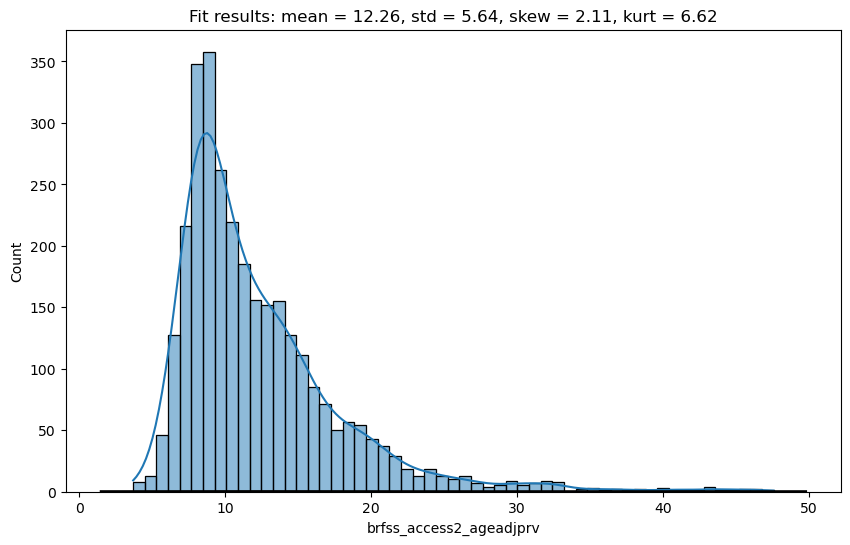

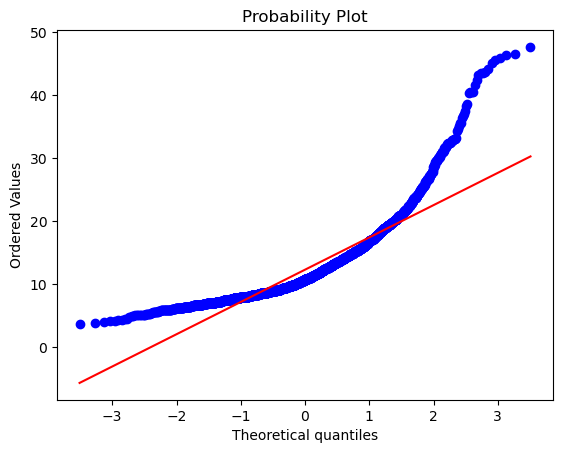

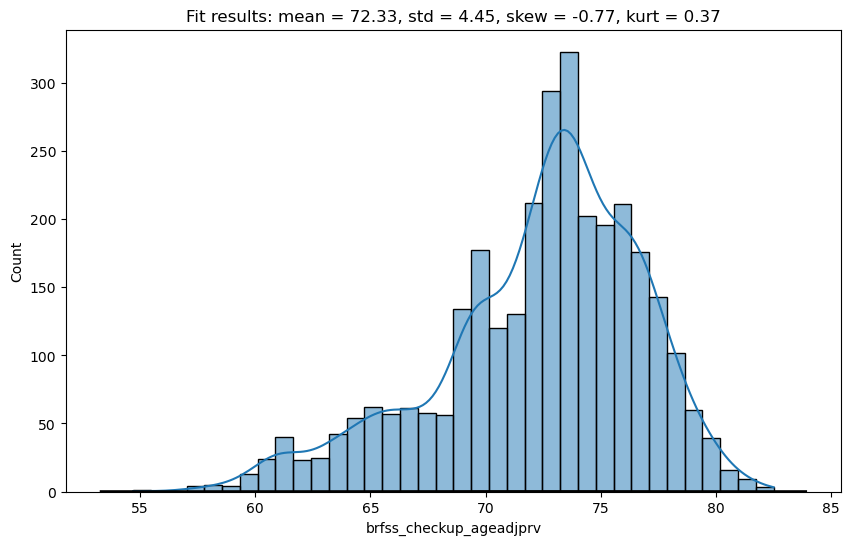

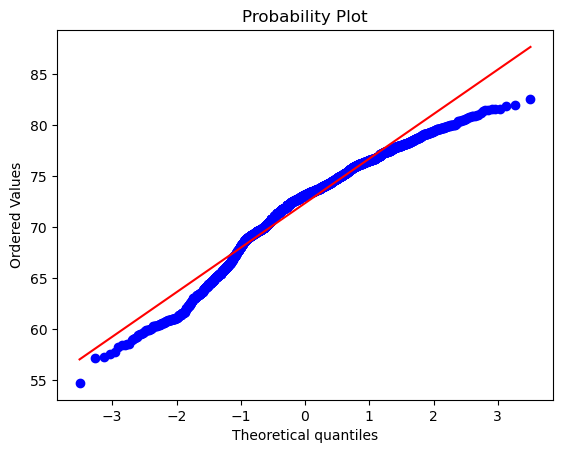

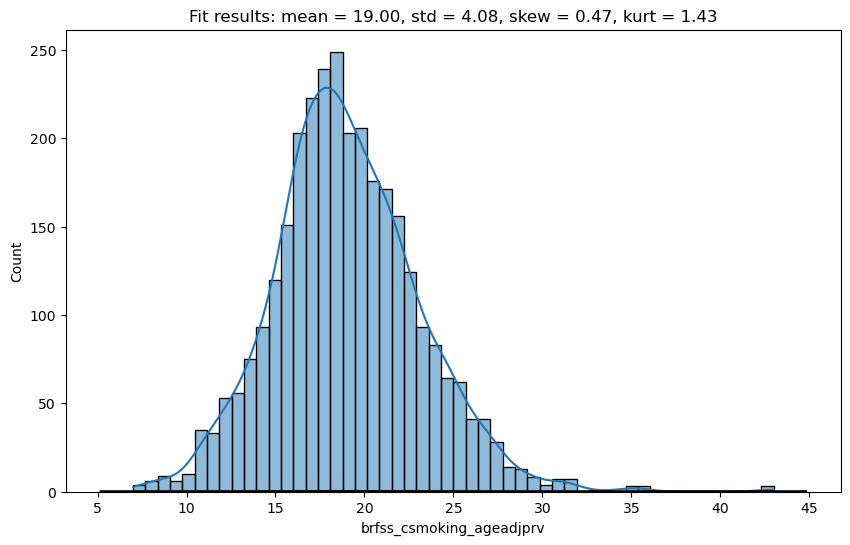

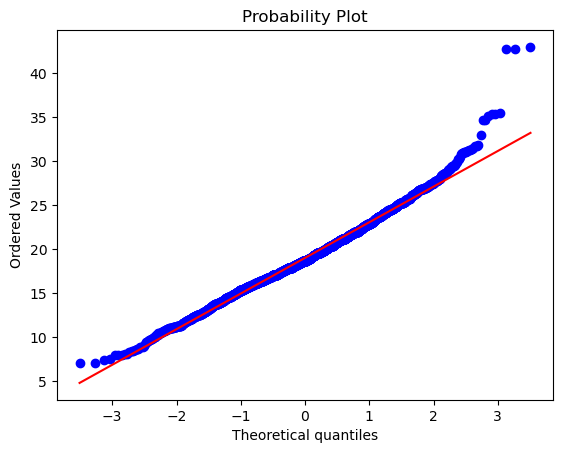

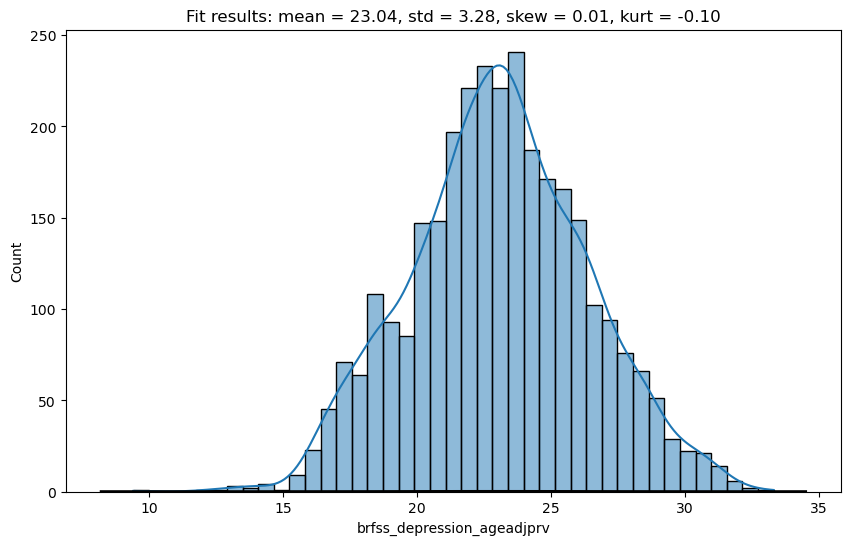

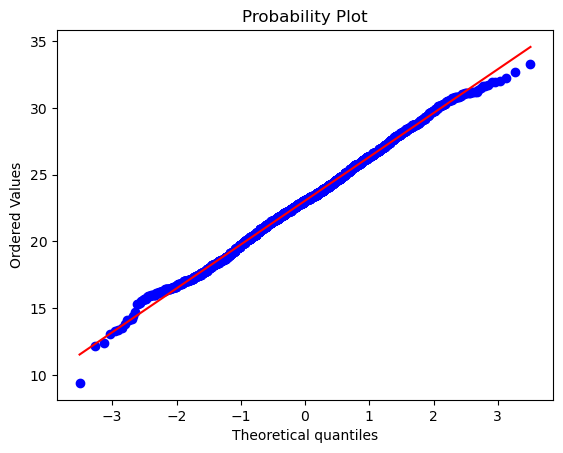

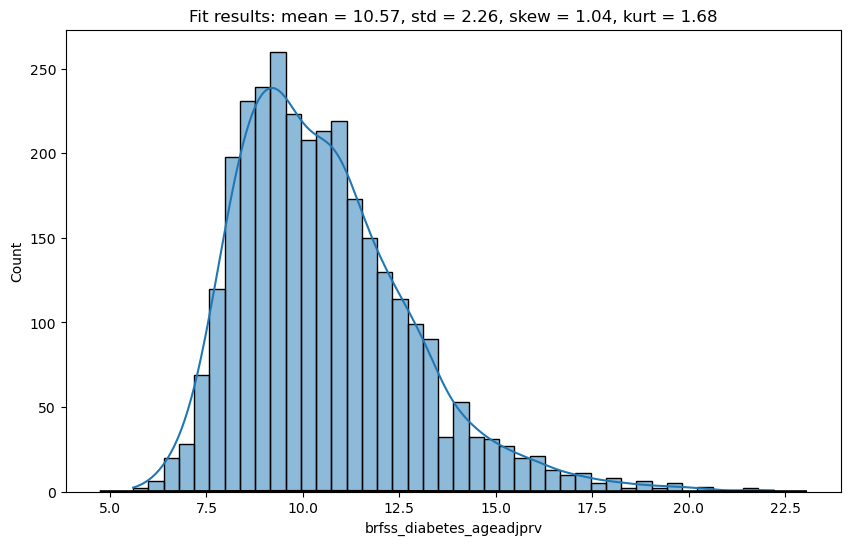

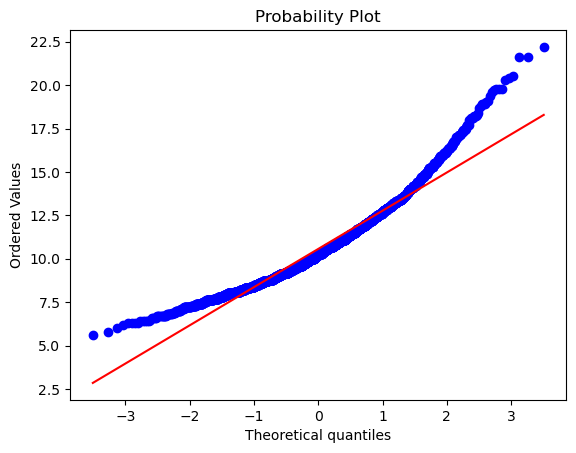

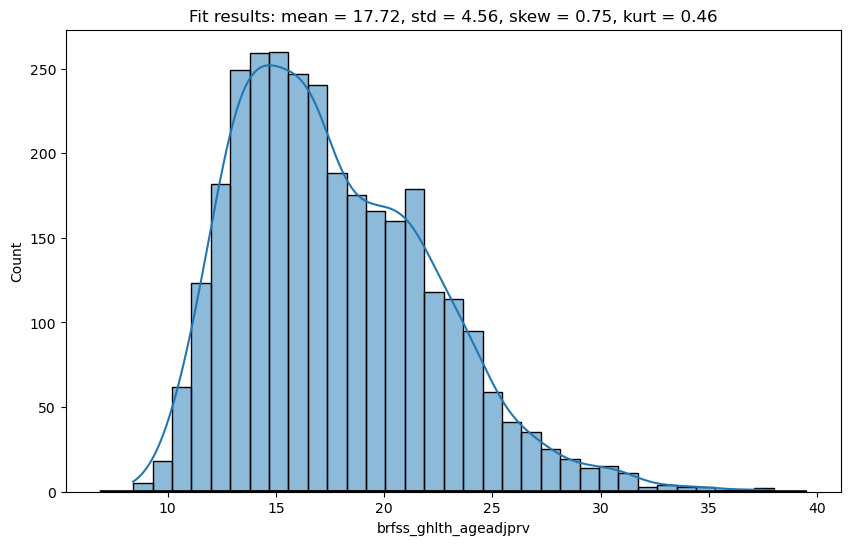

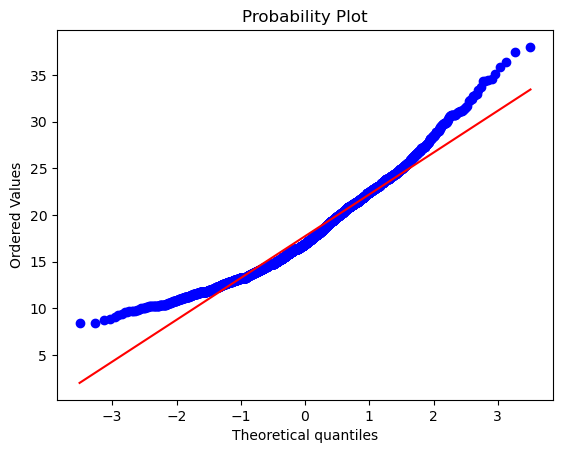

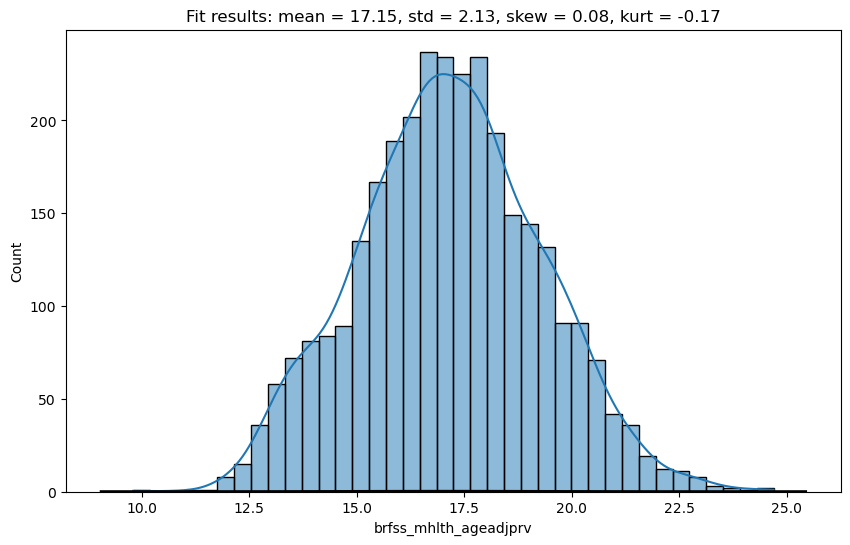

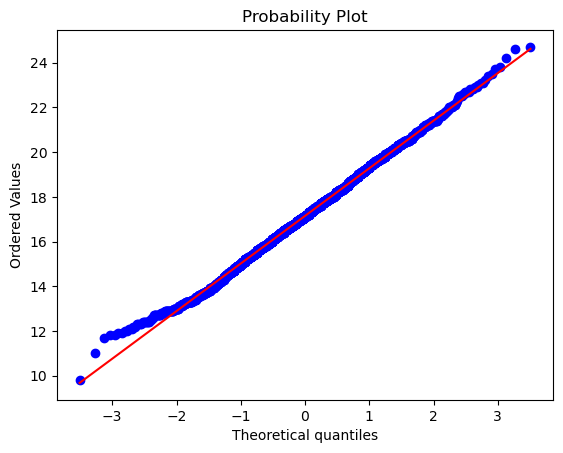

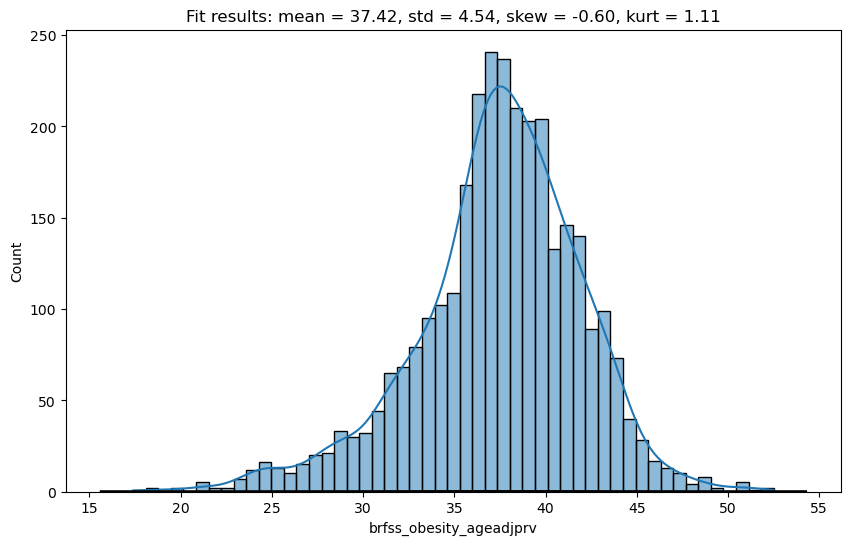

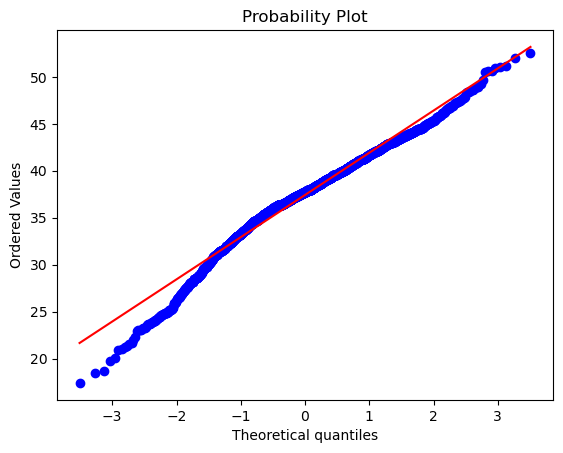

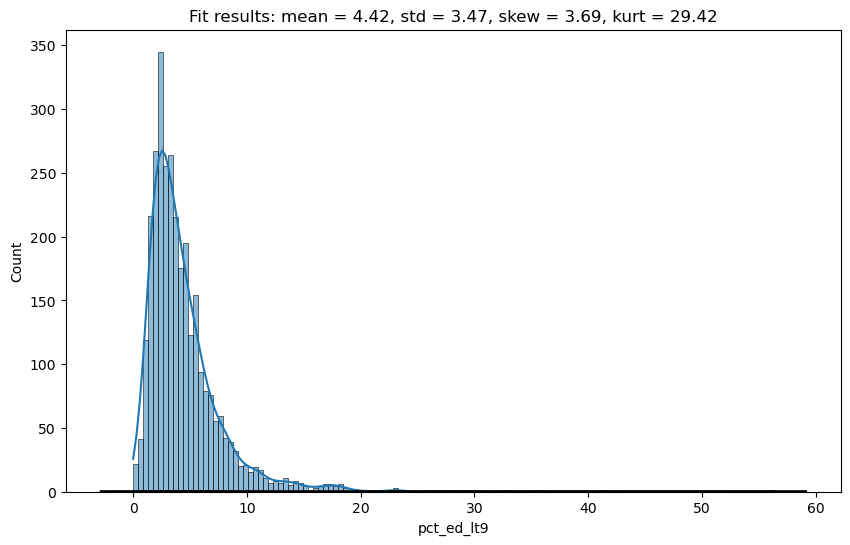

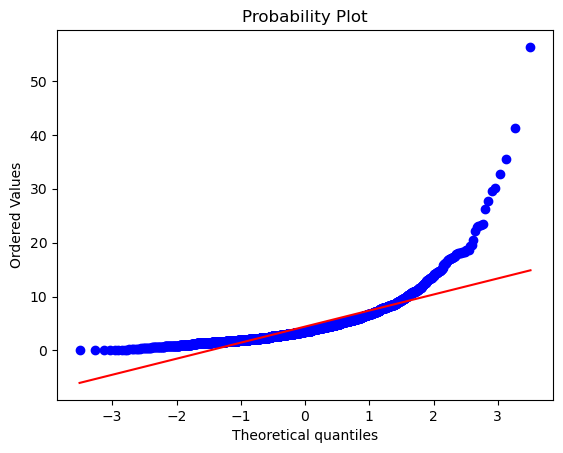

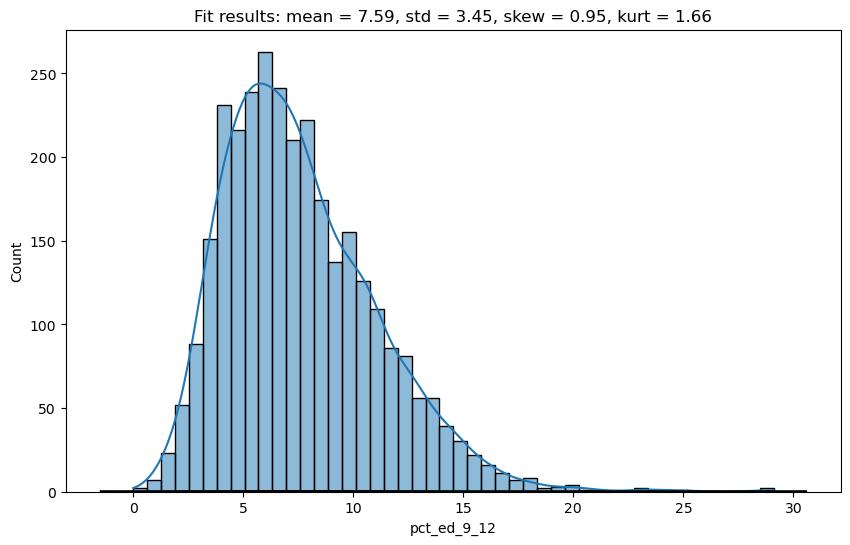

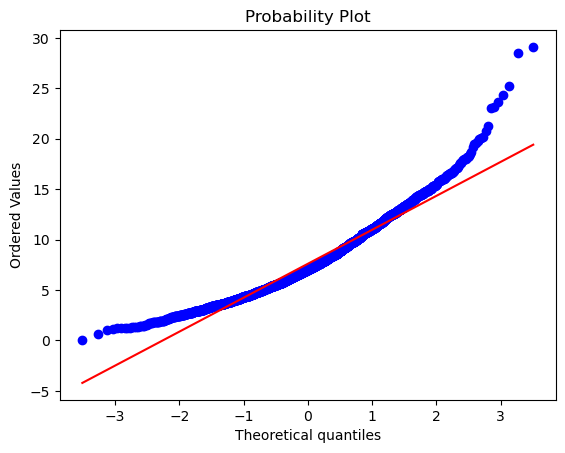

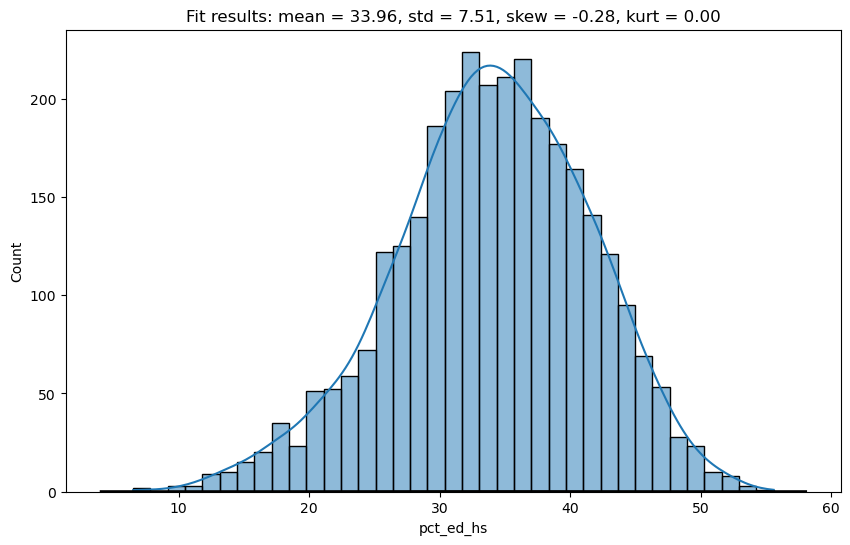

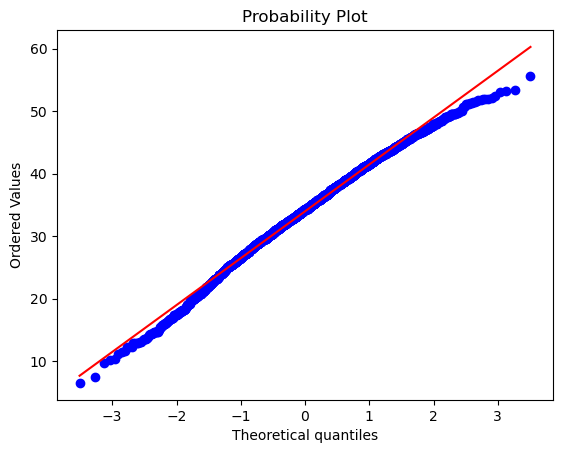

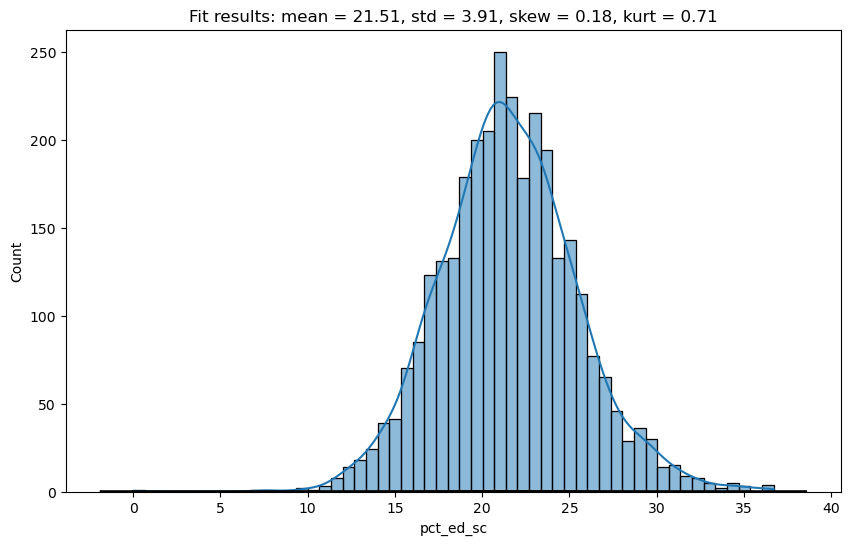

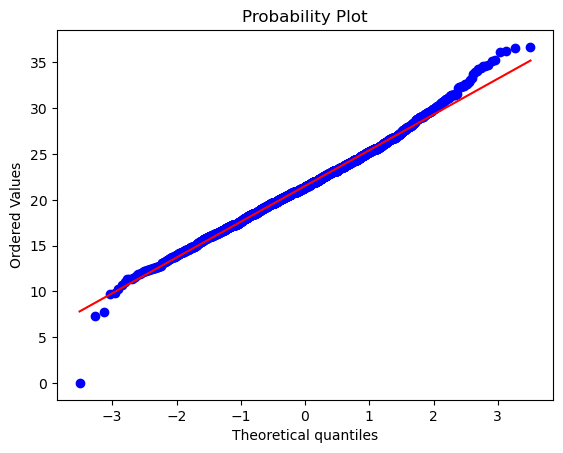

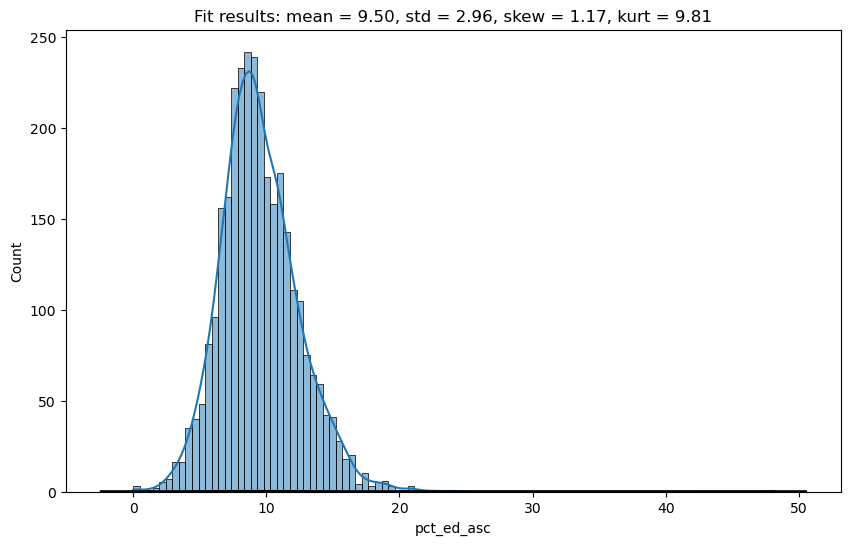

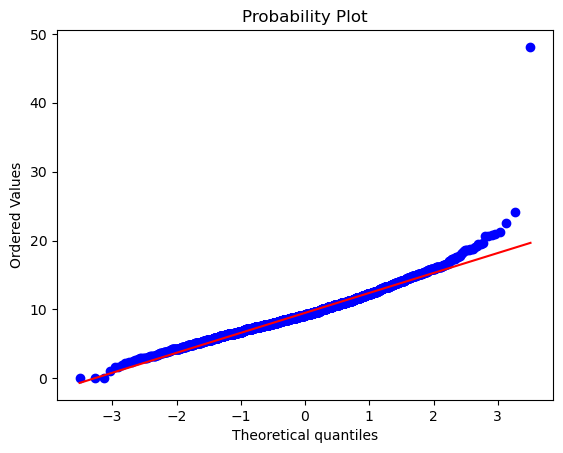

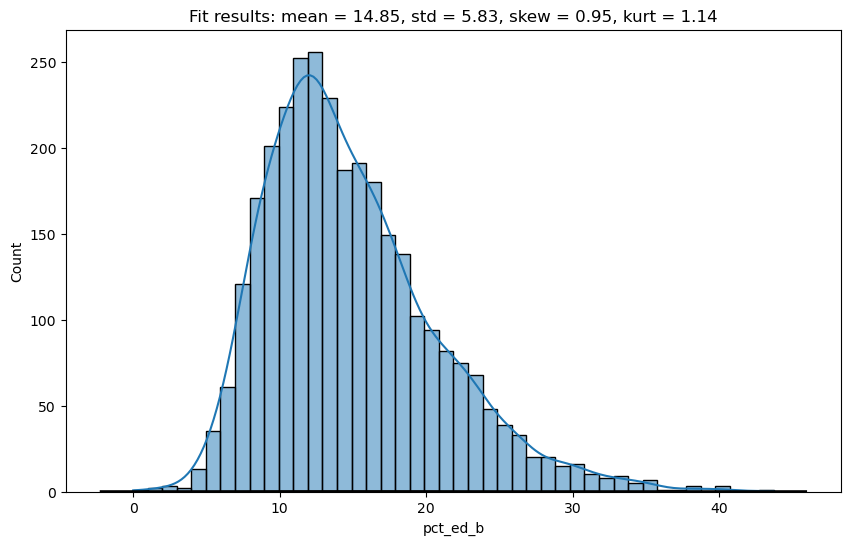

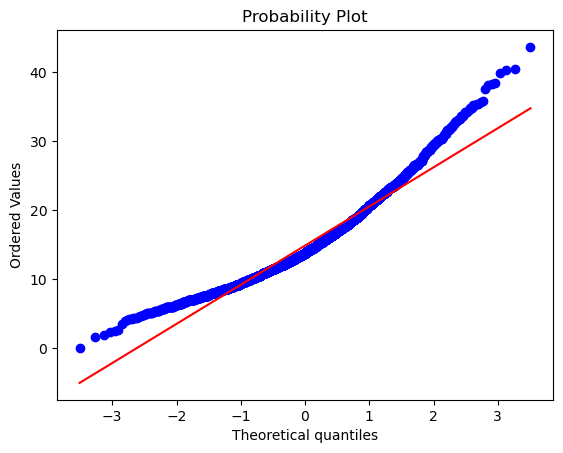

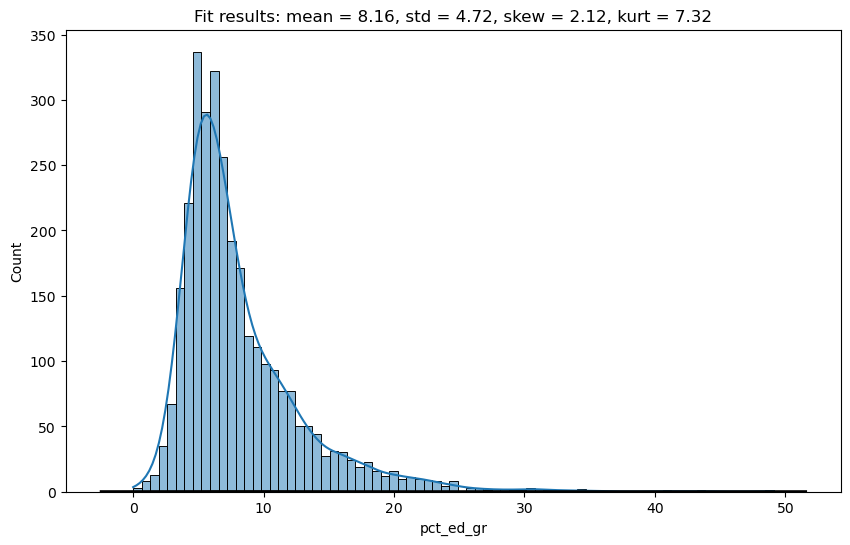

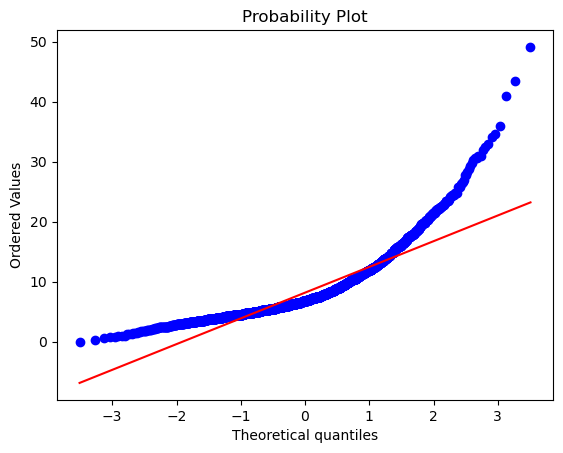

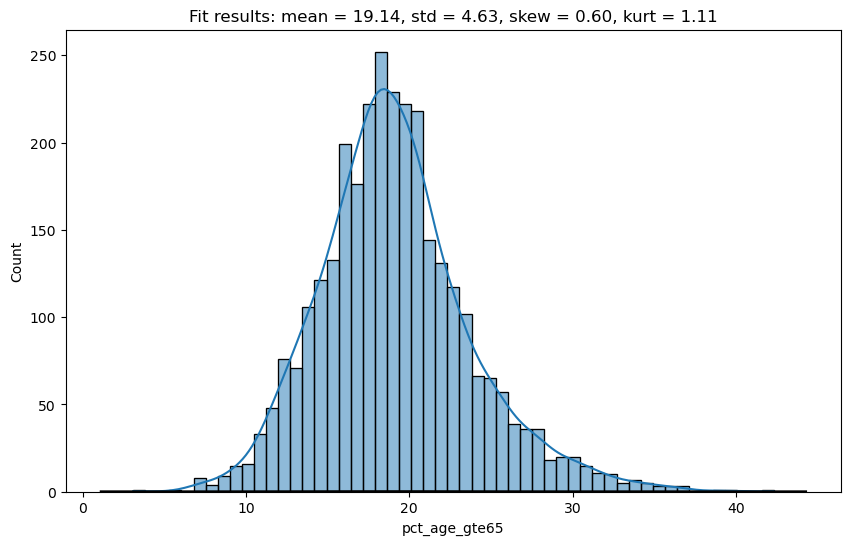

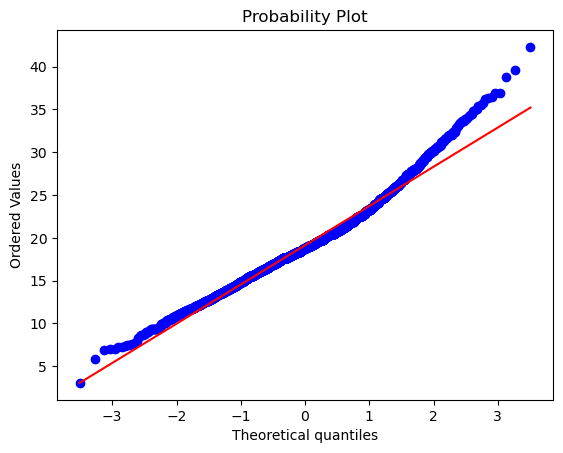

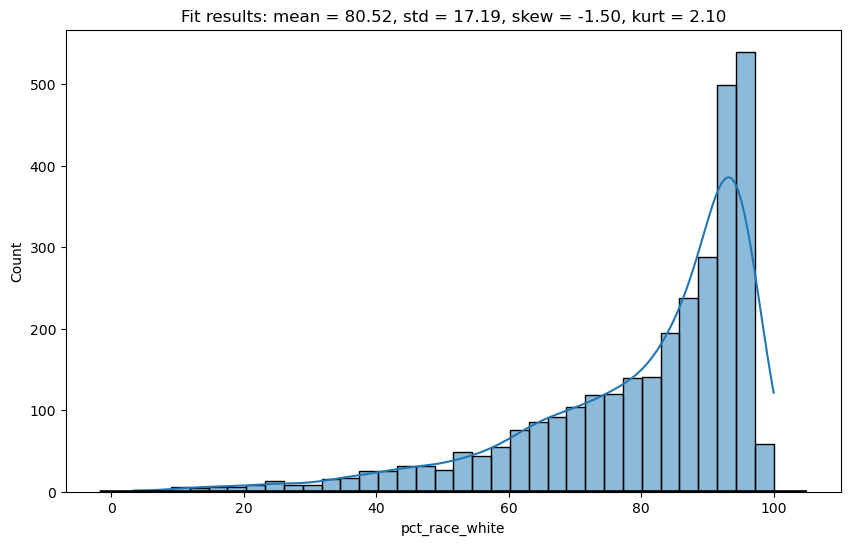

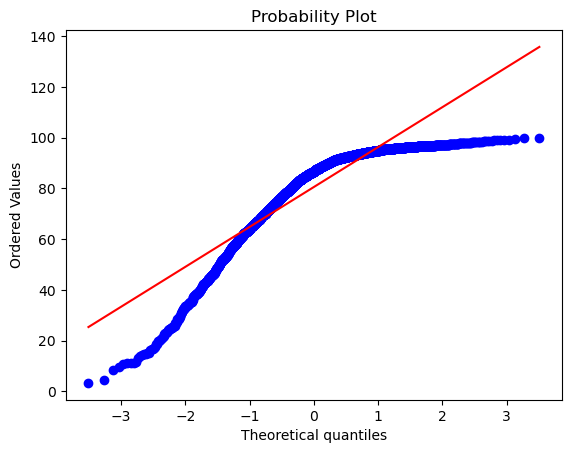

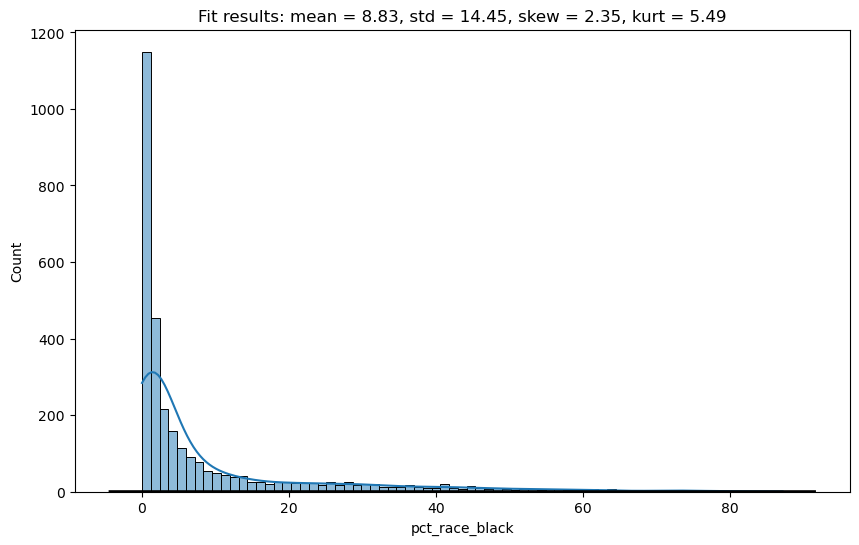

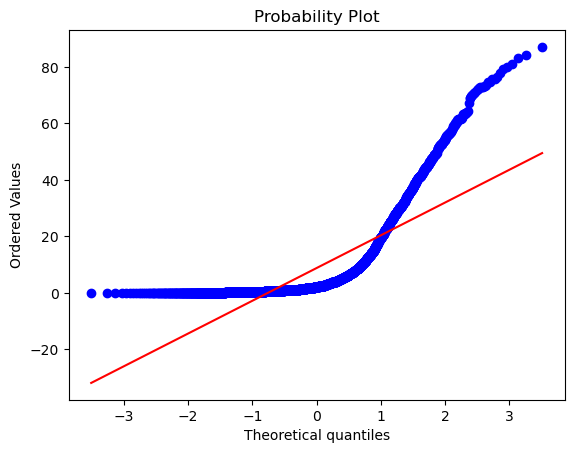

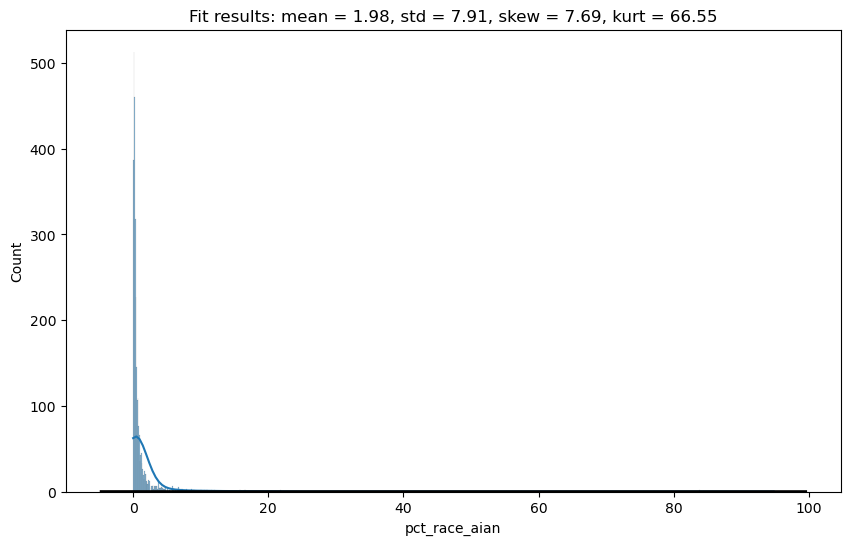

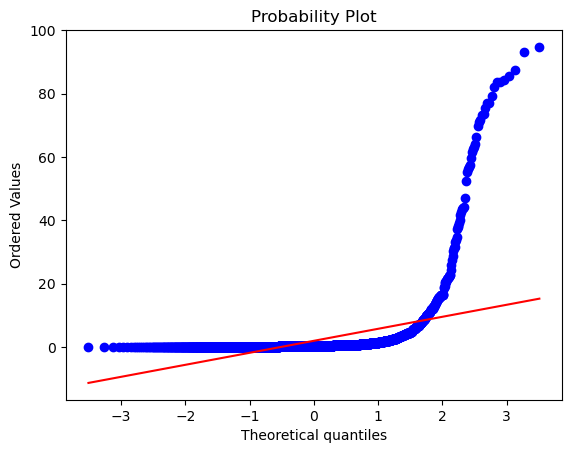

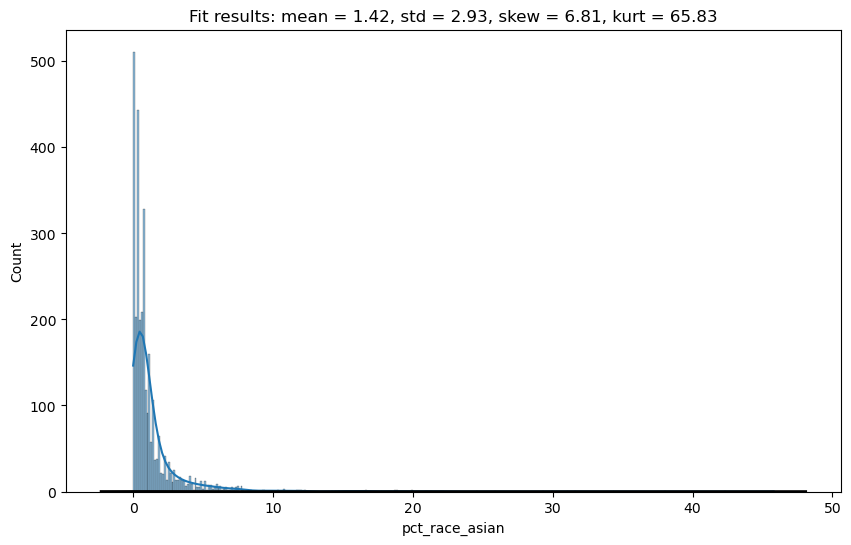

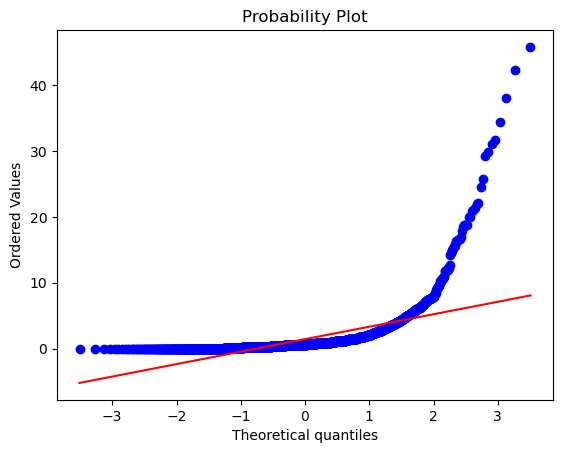

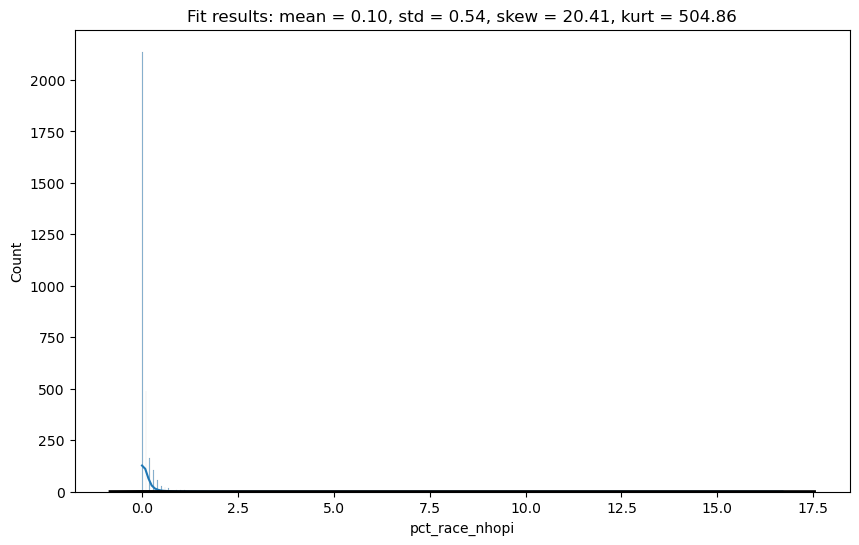

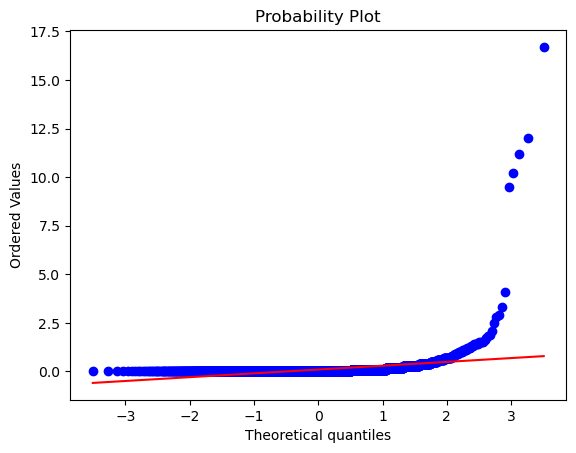

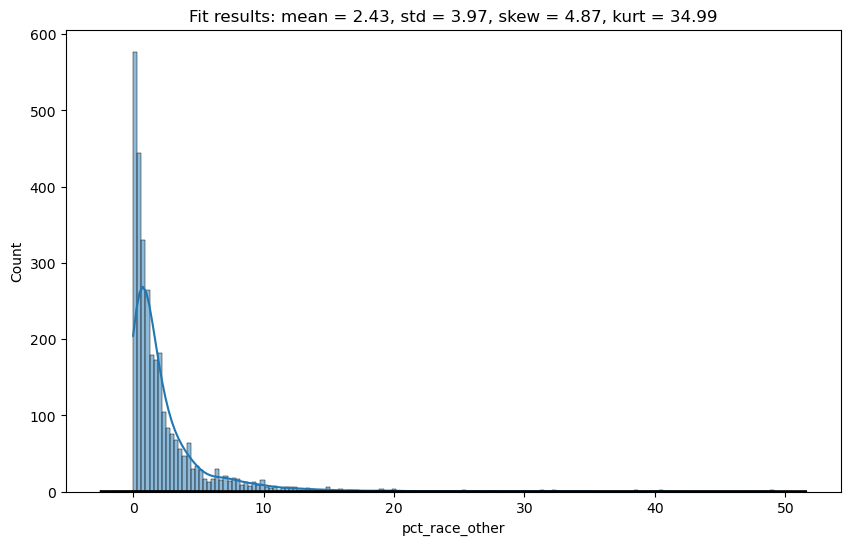

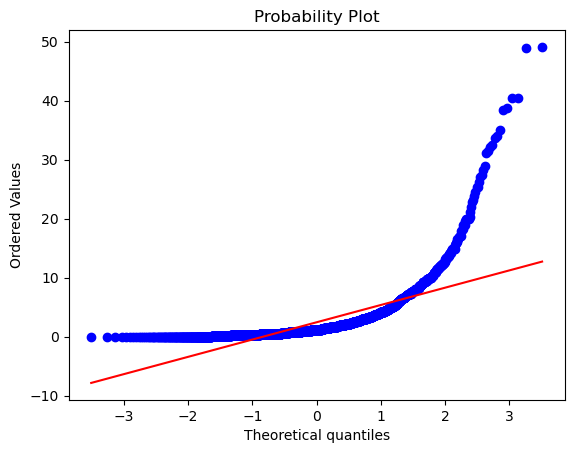

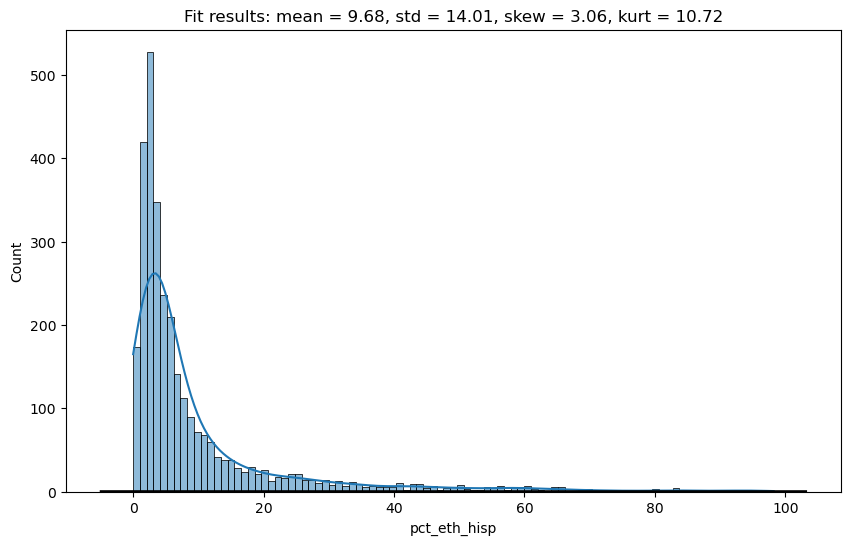

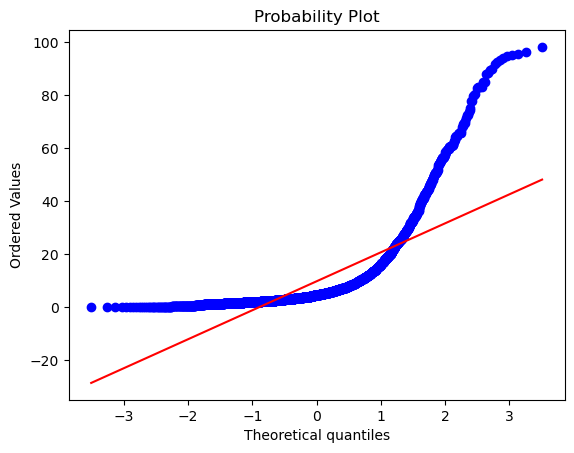

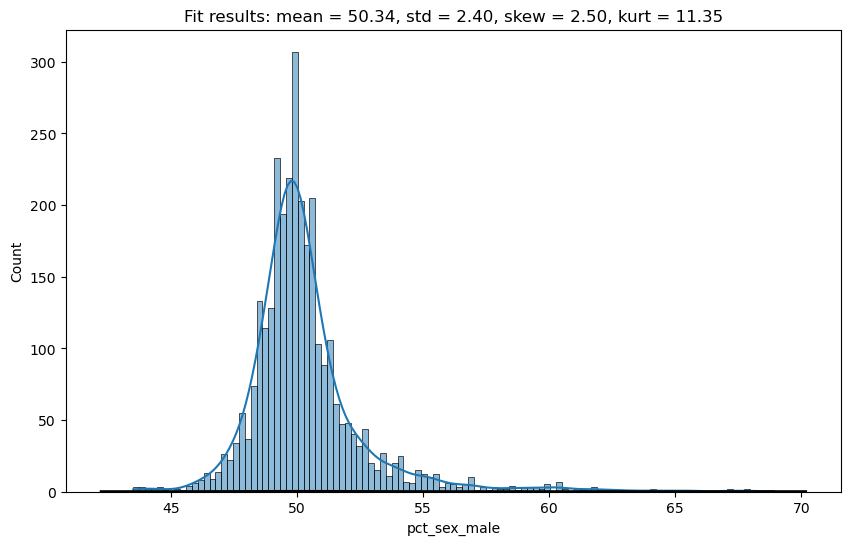

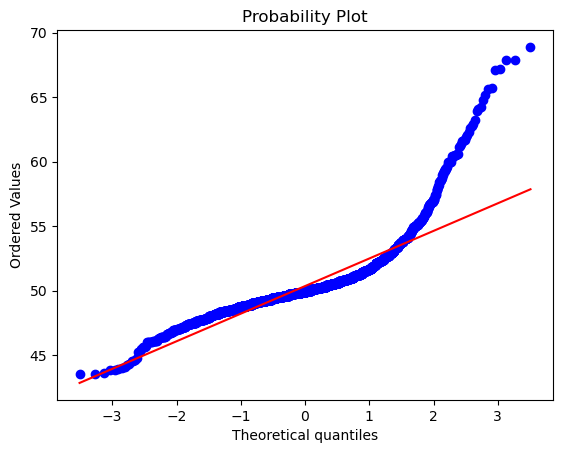

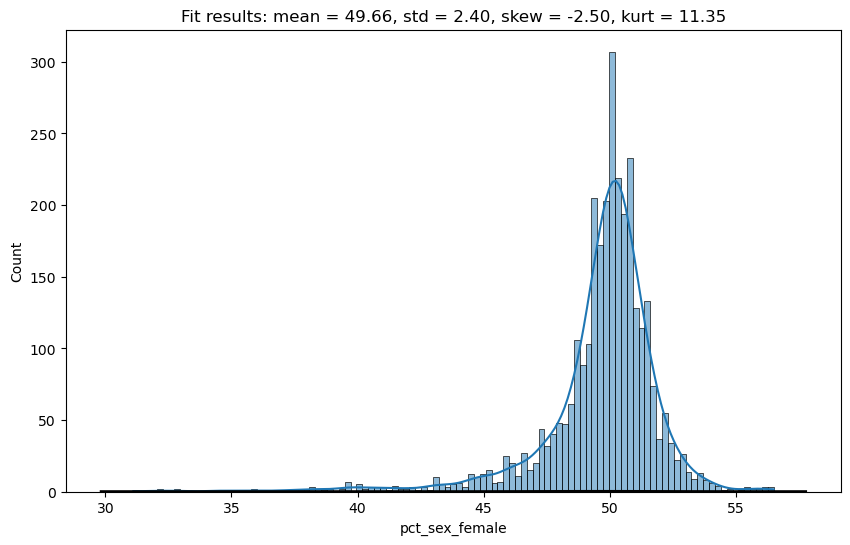

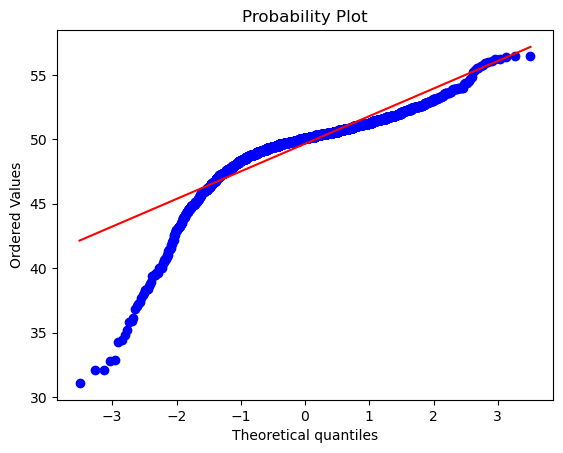

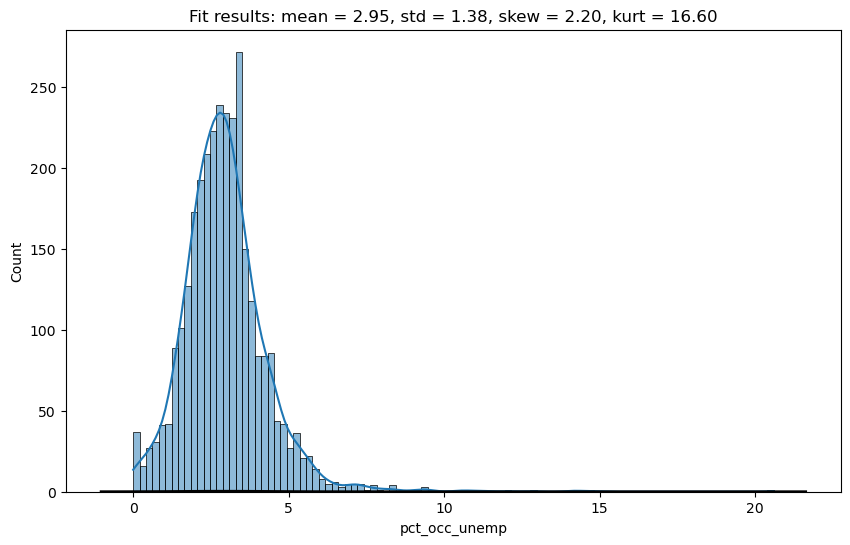

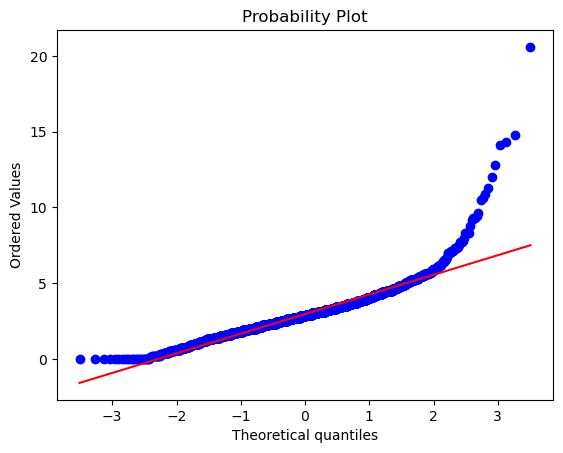

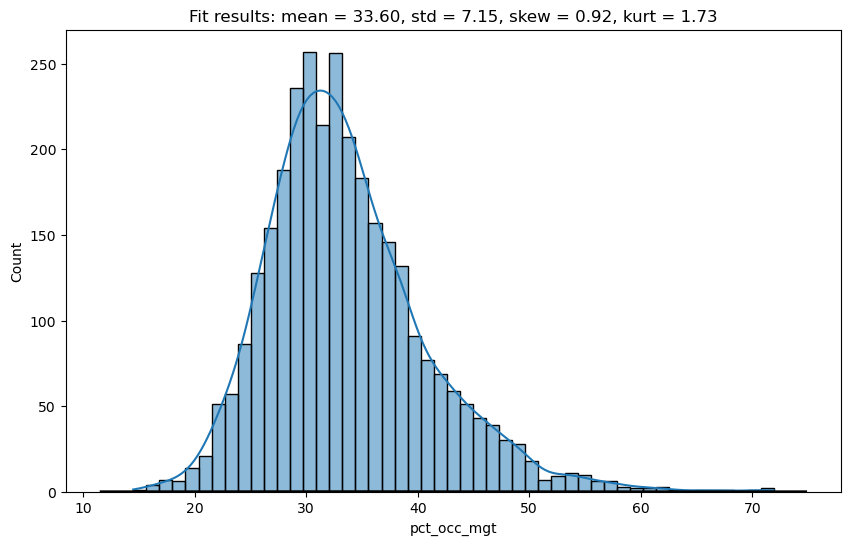

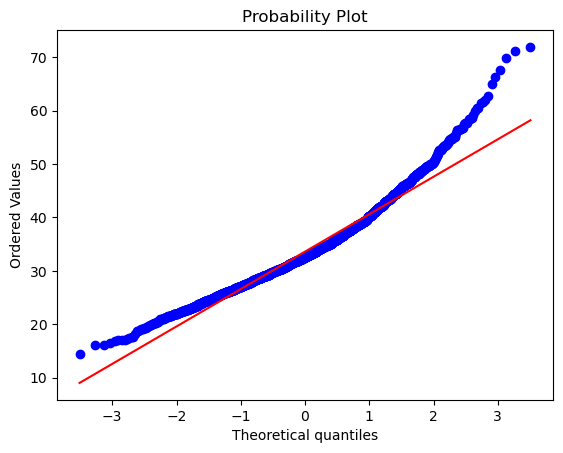

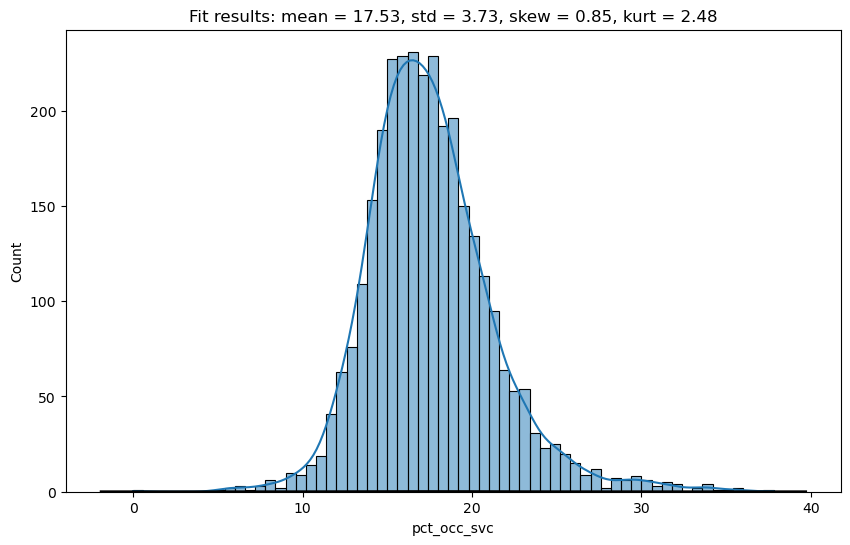

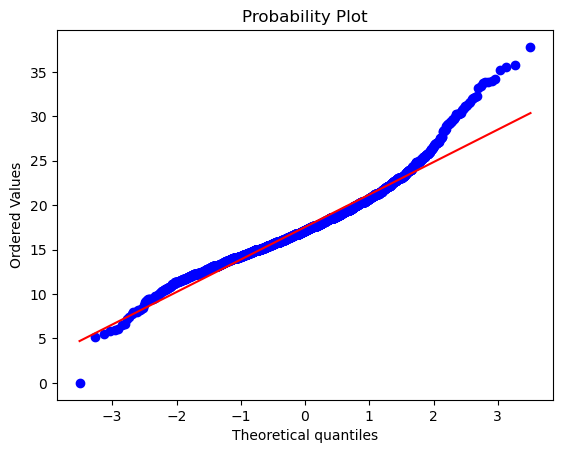

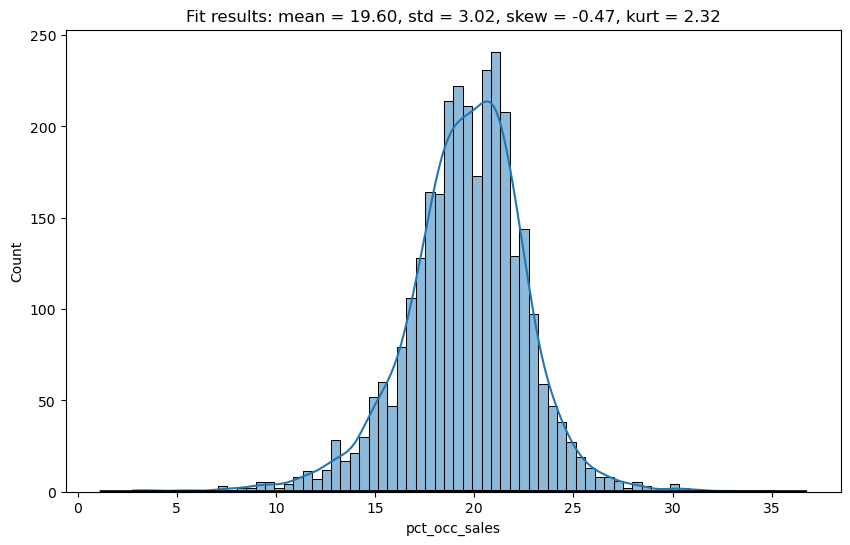

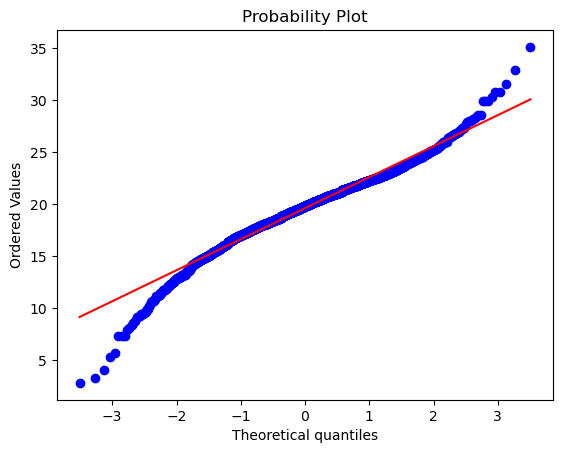

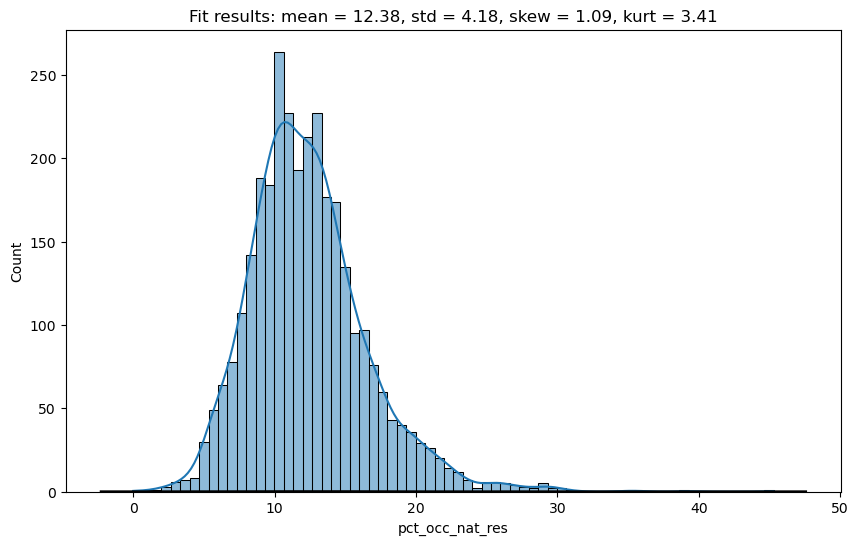

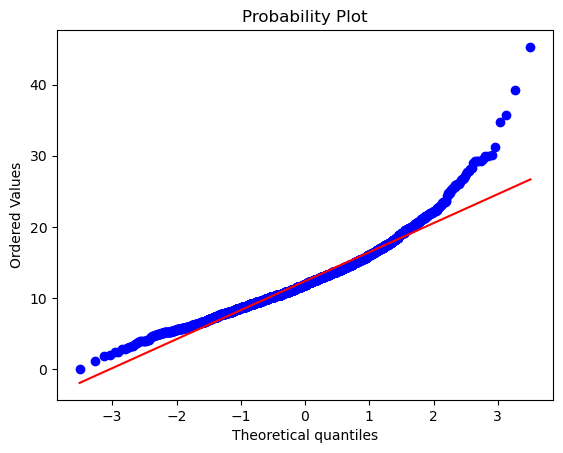

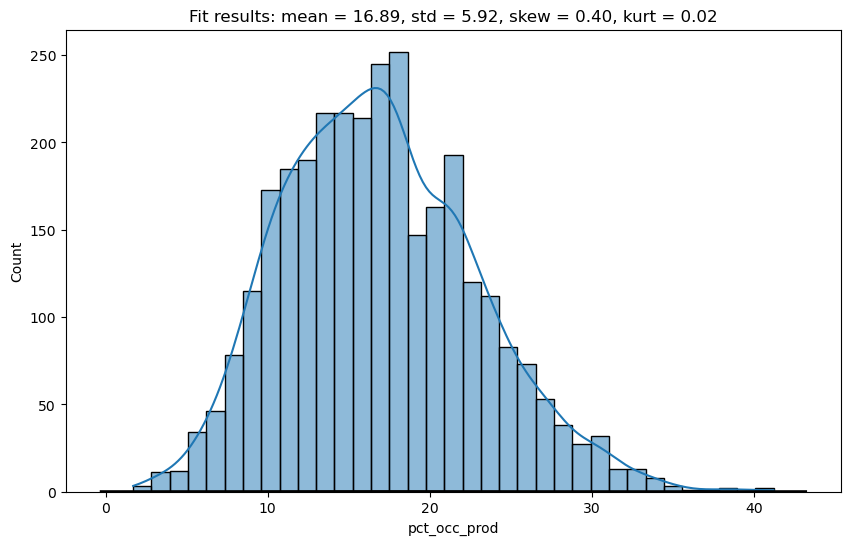

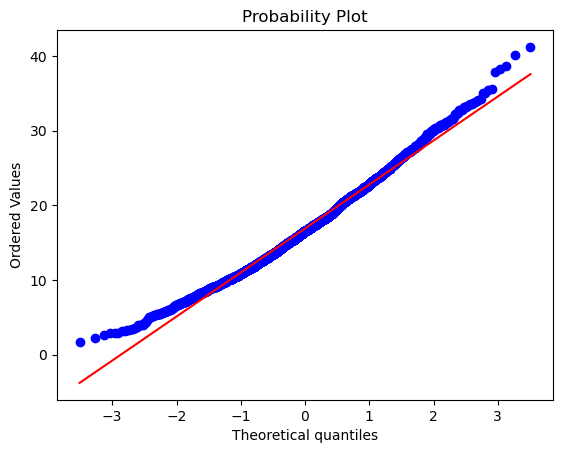

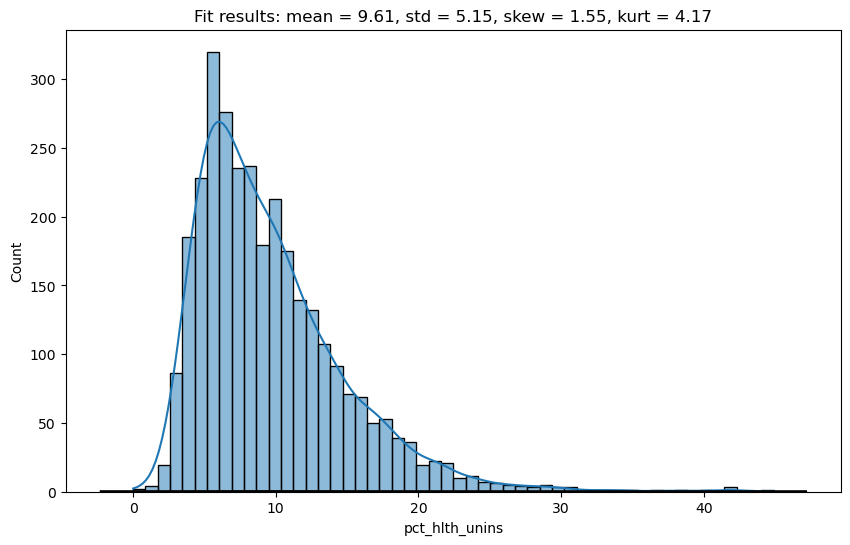

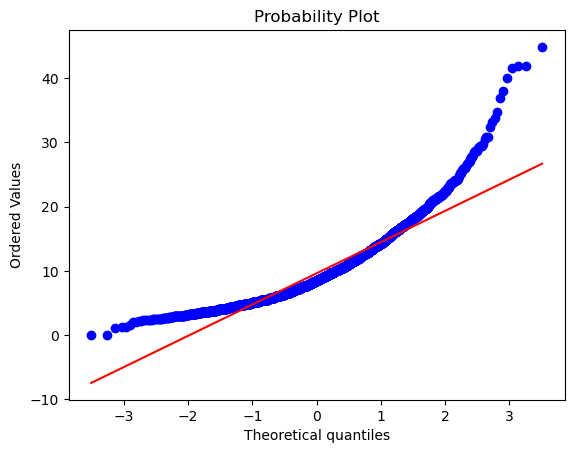

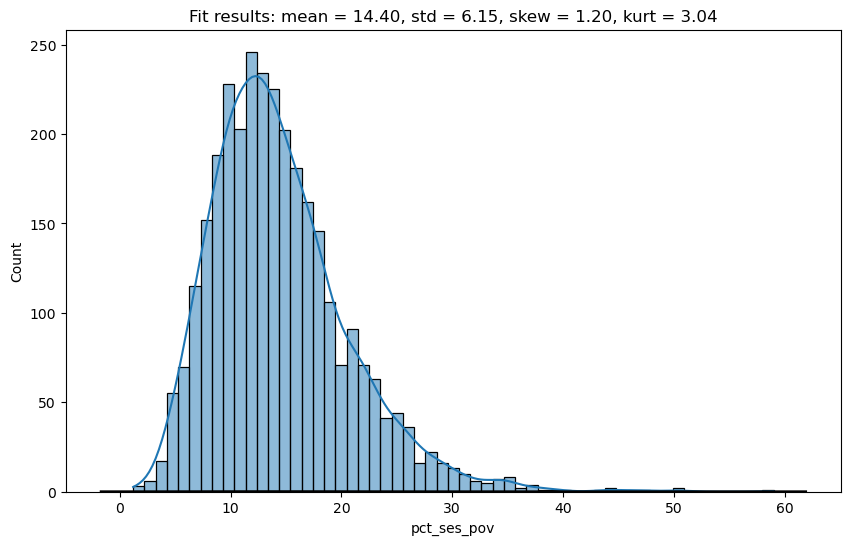

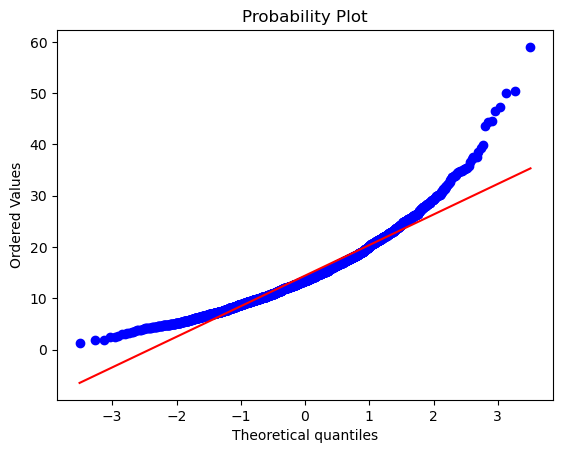

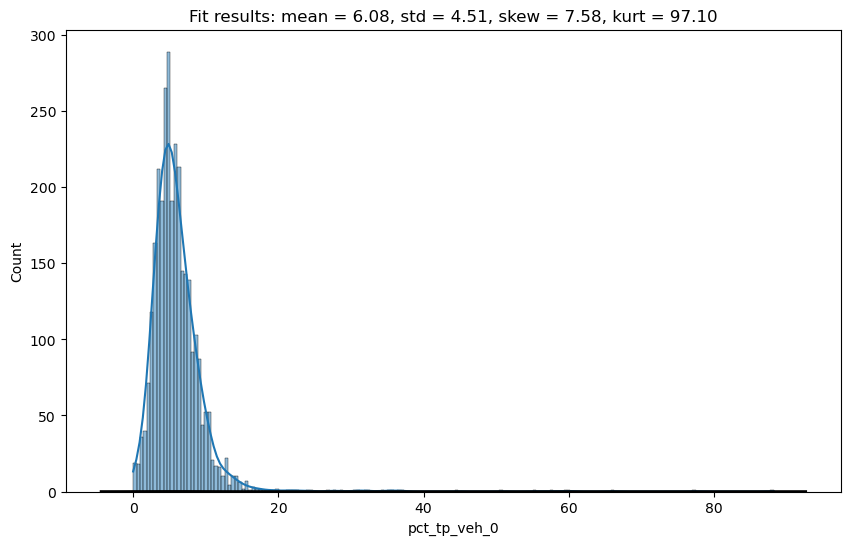

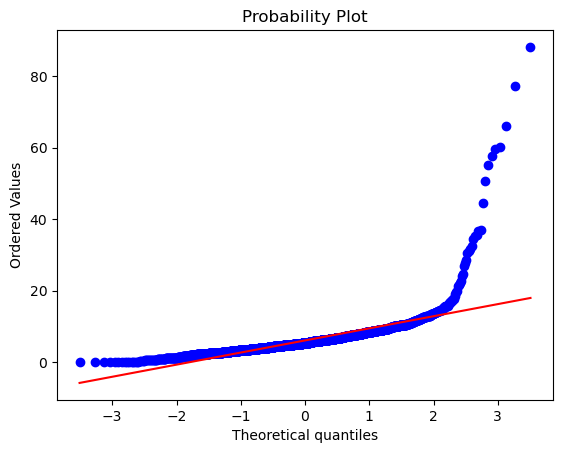

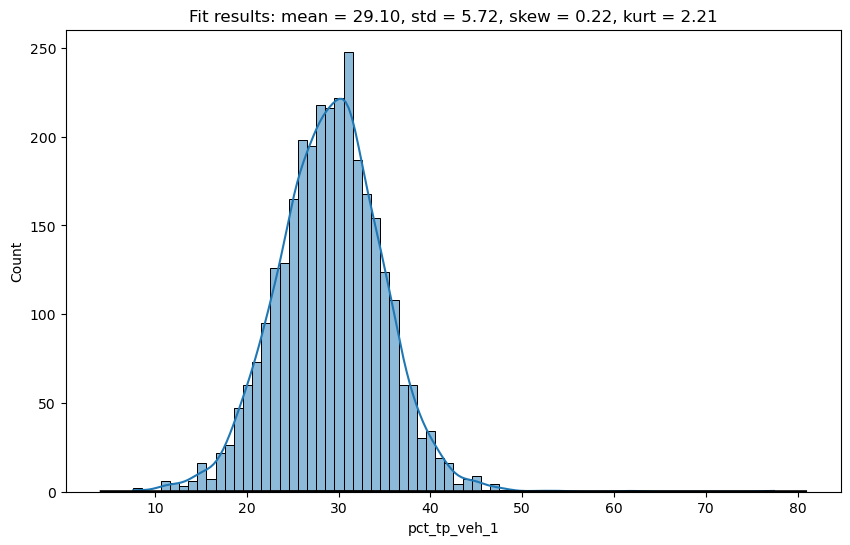

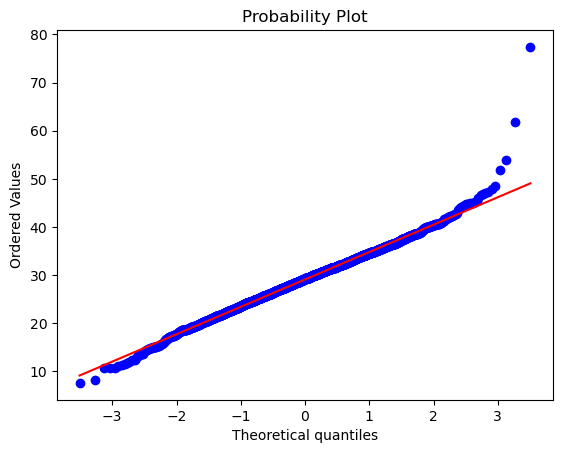

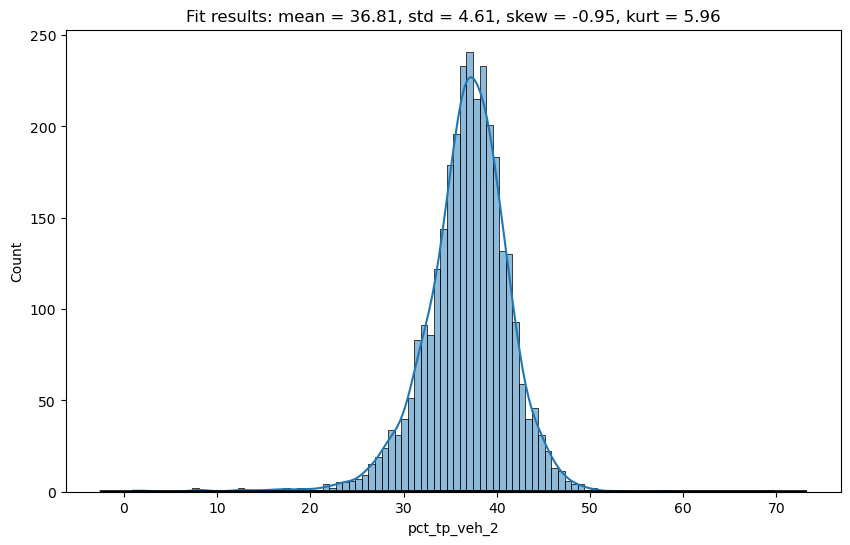

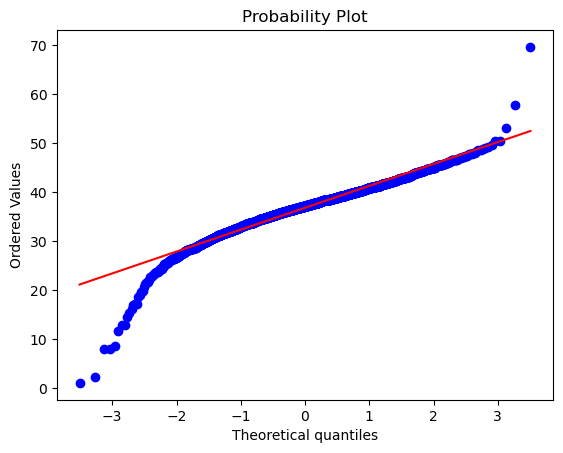

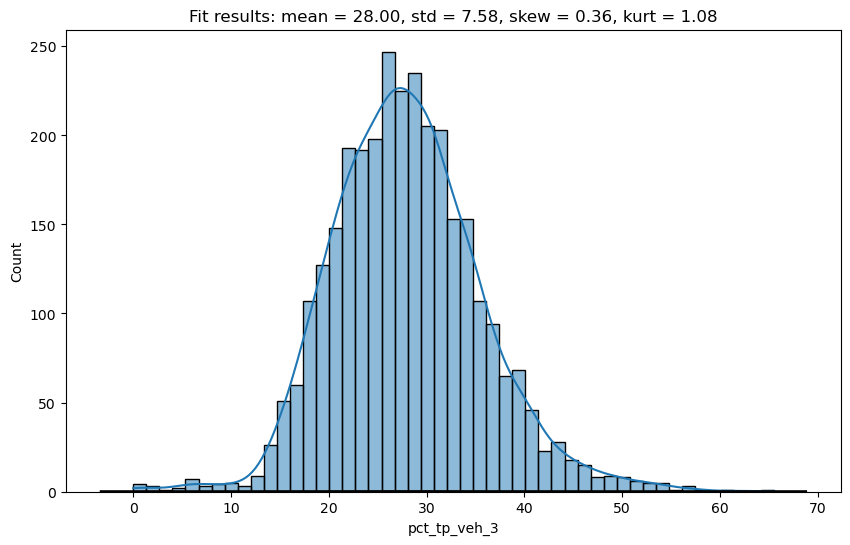

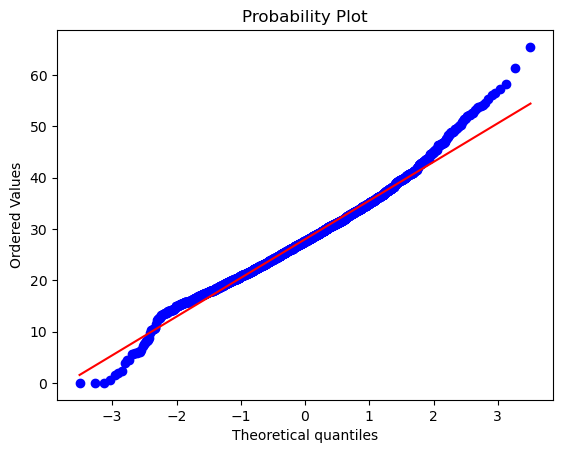

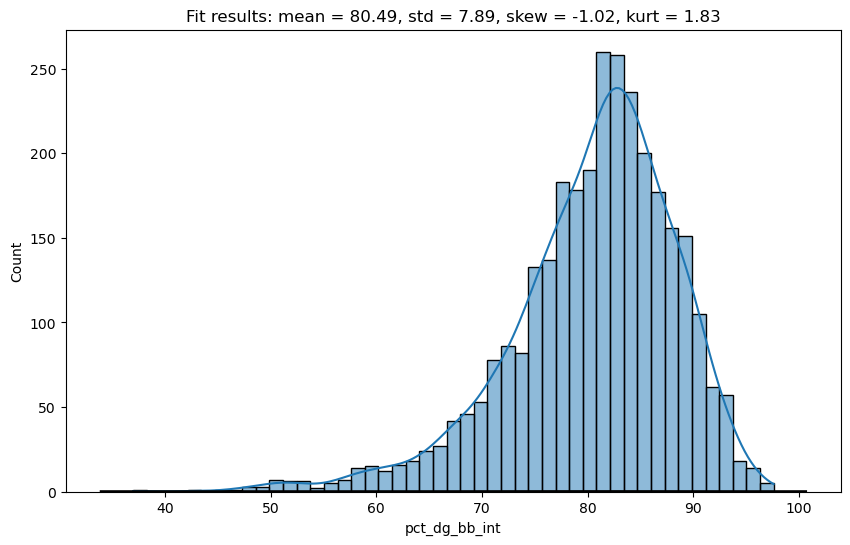

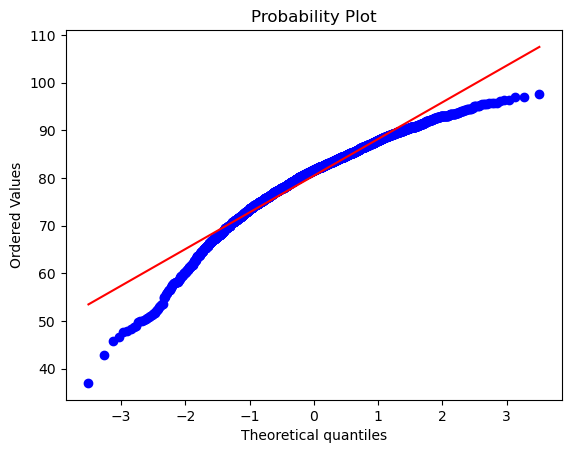

In [12]:
for i in features:
    analyze_distribution(df, i)

## Univariate Analysis - Correlation

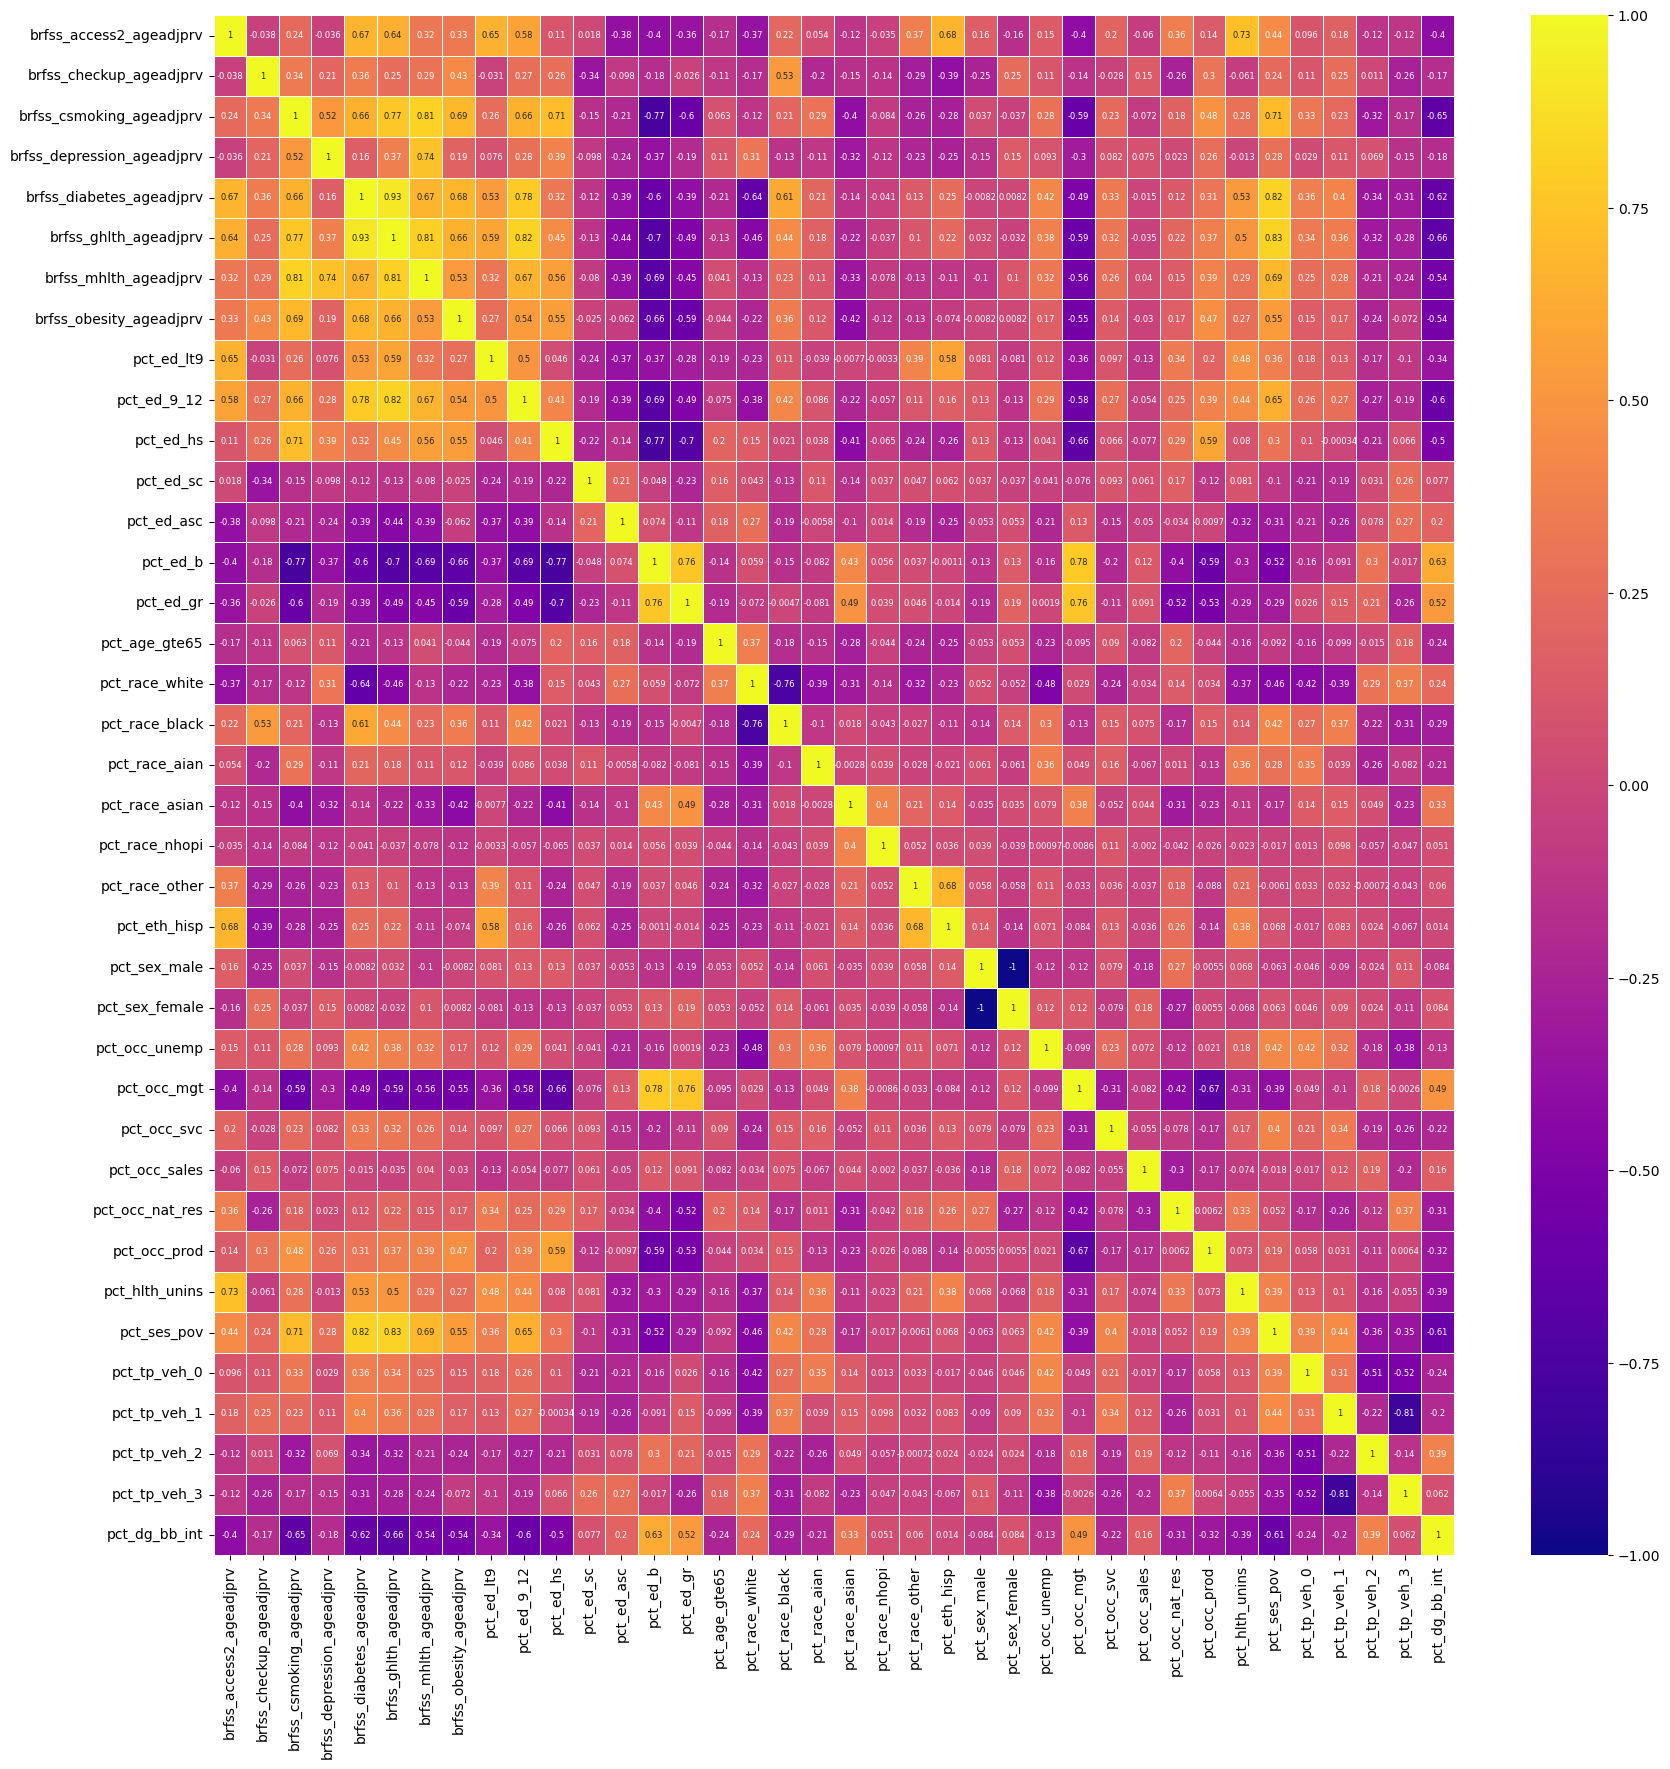

feature1                  feature2  correlation
0                 pct_eth_hisp            pct_race_other     0.682311
1      brfss_obesity_ageadjprv  brfss_diabetes_ageadjprv     0.683073
2        brfss_mhlth_ageadjprv               pct_ses_pov     0.688144
3     brfss_csmoking_ageadjprv   brfss_obesity_ageadjprv     0.692554
4     brfss_csmoking_ageadjprv               pct_ses_pov     0.710255
5                    pct_ed_hs  brfss_csmoking_ageadjprv     0.713761
6      brfss_access2_ageadjprv            pct_hlth_unins     0.730730
7   brfss_depression_ageadjprv     brfss_mhlth_ageadjprv     0.735761
8                  pct_occ_mgt                 pct_ed_gr     0.756401
9                     pct_ed_b                 pct_ed_gr     0.764301
10    brfss_csmoking_ageadjprv     brfss_ghlth_ageadjprv     0.769268
11                 pct_ed_9_12  brfss_diabetes_ageadjprv     0.776313
12                 pct_occ_mgt                  pct_ed_b     0.777645
13       brfss_ghlth_ageadjprv     brfss_mhlth_ageadjprv     0.812276
14    brfss_csmoking_ageadjprv     brfss_mhlth_ageadjprv     0.813041
15                 pct_ed_9_12     brfss_ghlth_ageadjprv     0.820532
16    brfss_diabetes_ageadjprv               pct_ses_pov     0.824549
17                 pct_ses_pov     brfss_ghlth_ageadjprv     0.827998
18    brfss_diabetes_ageadjprv     brfss_ghlth_ageadjprv     0.927572
19                pct_sex_male            pct_sex_female    -1.000000
20                pct_tp_veh_3              pct_tp_veh_1    -0.807292
21                    pct_ed_b  brfss_csmoking_ageadjprv    -0.771570
22                    pct_ed_b                 pct_ed_hs    -0.770391
23              pct_race_black            pct_race_white    -0.757329
24                    pct_ed_b     brfss_ghlth_ageadjprv    -0.704377
25                   pct_ed_hs                 pct_ed_gr    -0.701566
26                 pct_ed_9_12                  pct_ed_b    -0.689861
27       brfss_mhlth_ageadjprv                  pct_ed_b    -0.689738
28                pct_occ_prod               pct_occ_mgt    -0.670625
29                    pct_ed_b   brfss_obesity_ageadjprv    -0.662791
30               pct_dg_bb_int     brfss_ghlth_ageadjprv    -0.662506
31                 pct_occ_mgt                 pct_ed_hs    -0.655527
32               pct_dg_bb_int  brfss_csmoking_ageadjprv    -0.653152
33    brfss_diabetes_ageadjprv            pct_race_white    -0.640247
34    brfss_diabetes_ageadjprv             pct_dg_bb_int    -0.620441
35                 pct_ses_pov             pct_dg_bb_int    -0.606104
36    brfss_csmoking_ageadjprv                 pct_ed_gr    -0.599543
37                 pct_ed_9_12             pct_dg_bb_int    -0.598564

In [13]:
corr = df[features].corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='plasma', linewidths=0.5, annot_kws={'size': 6})
plt.show()

corr = corr.unstack().sort_values(kind='quicksort').drop_duplicates()
top = corr[-20:-1]
bottom = corr[0:19]
top_bottom = pd.concat([top, bottom])
top_bottom = top_bottom.reset_index()
top_bottom.columns = ['feature1', 'feature2', 'correlation']
top_bottom

## Network Analysis

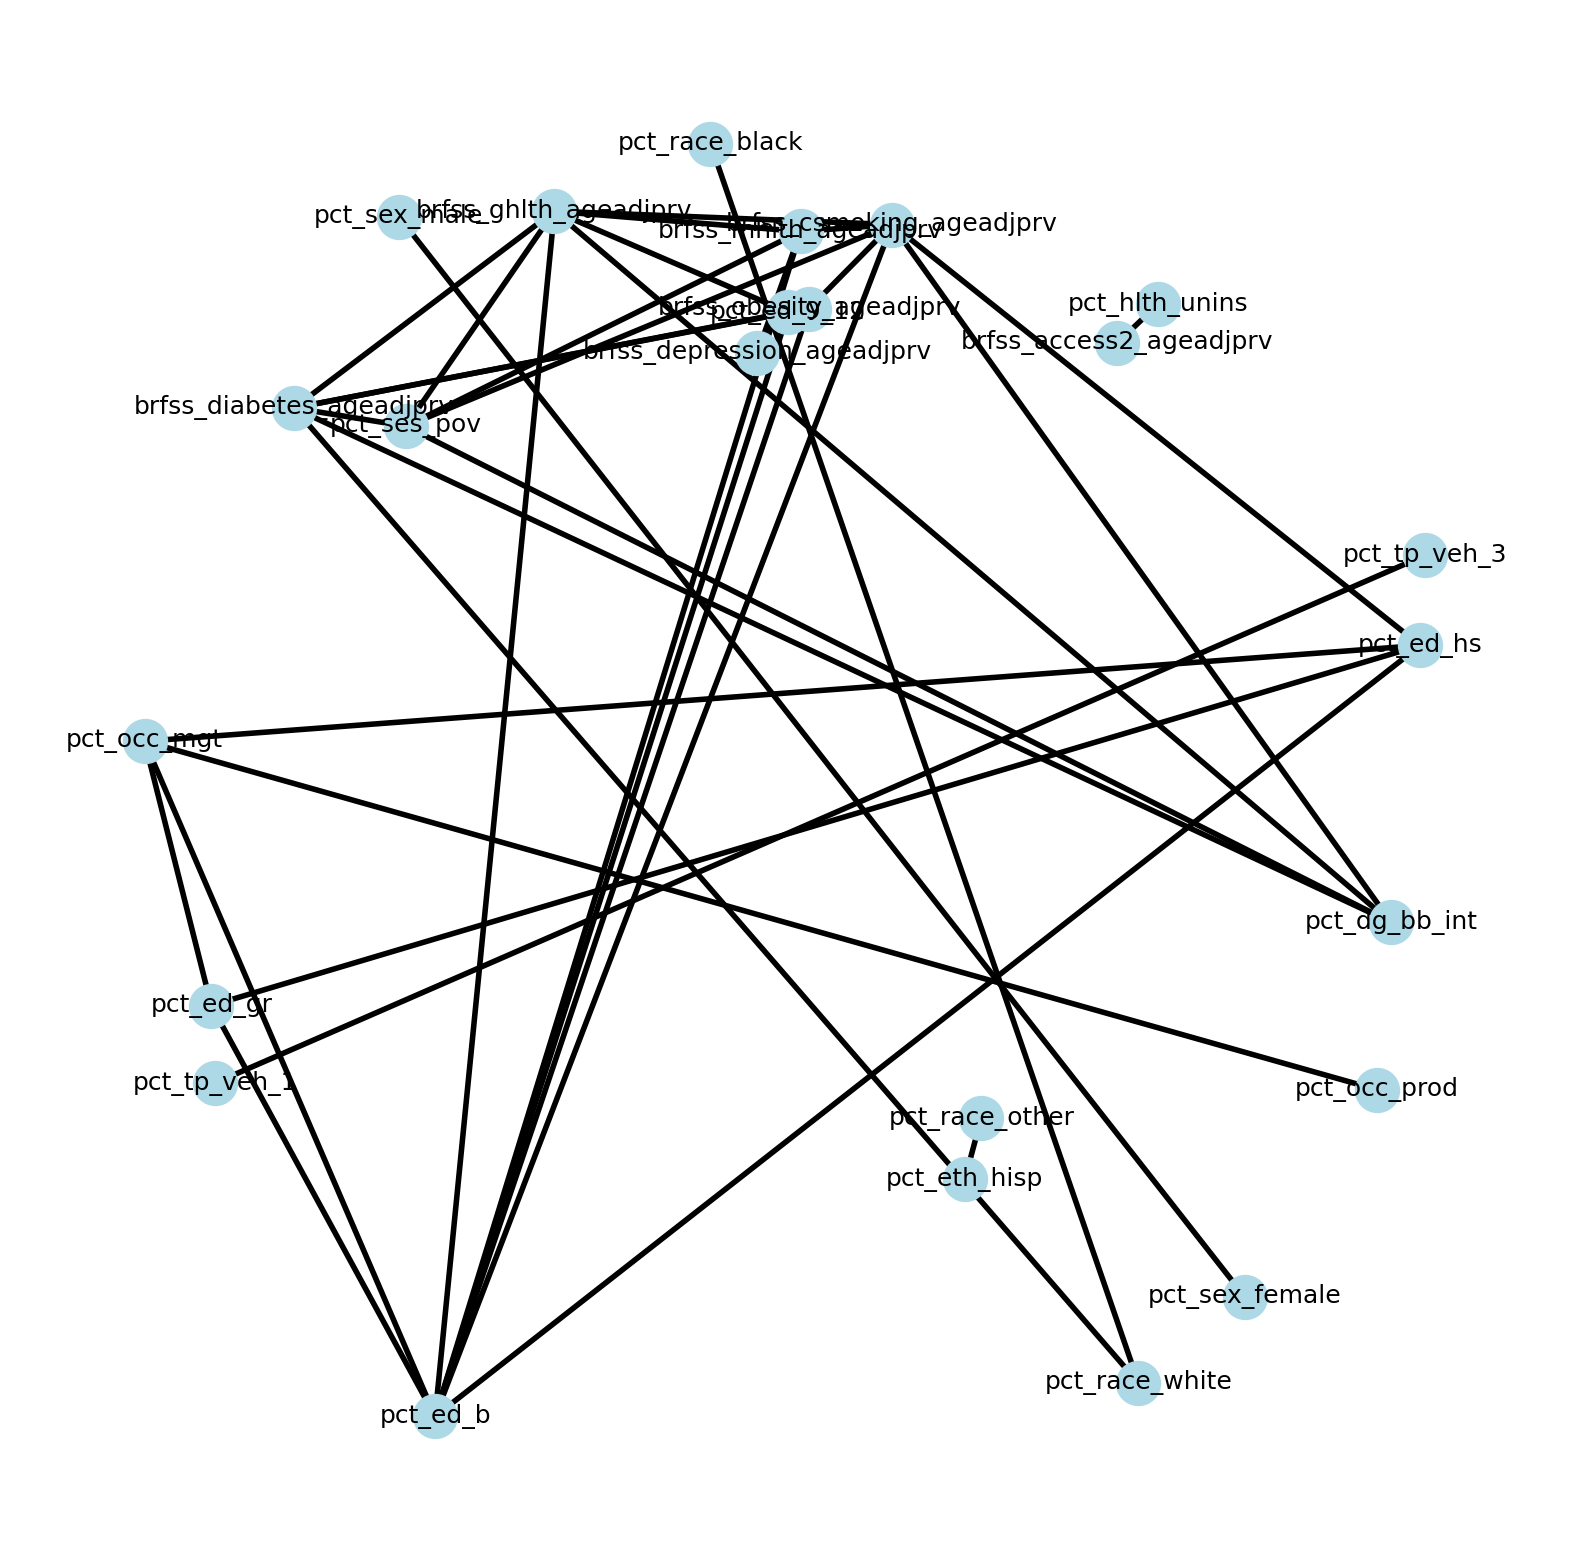

In [14]:
G = nx.Graph()
for feature1, feature2, correlation in top_bottom.values:
    if abs(correlation) > 0.60:
        G.add_edge(feature1, feature2, weight=correlation)

pos = nx.spring_layout(G)
edges = G.edges(data=True)
plt.figure(figsize=(20, 20))

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=4)
nx.draw_networkx_labels(G, pos, font_size=18, font_family='sans-serif')
plt.axis('off')
plt.show()


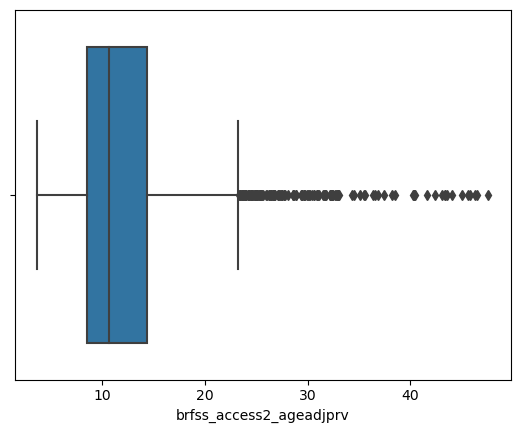

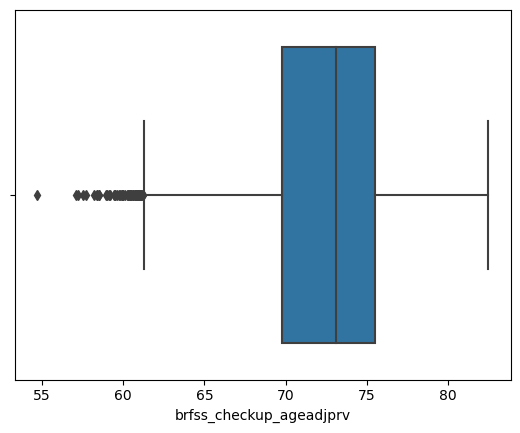

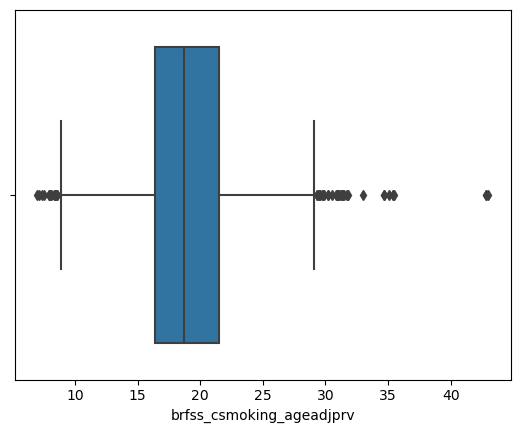

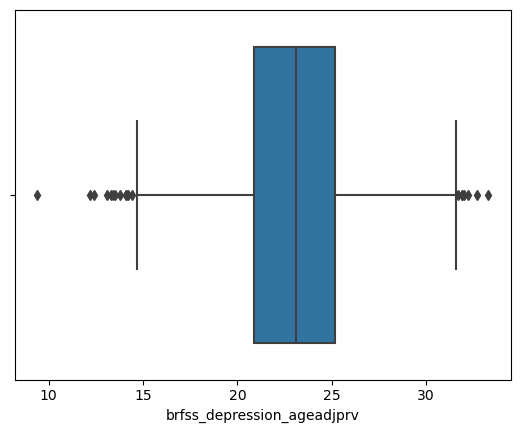

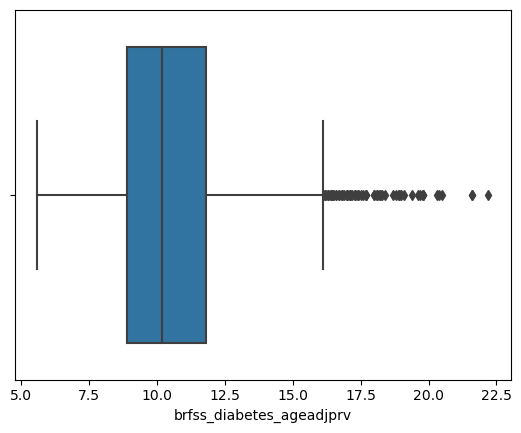

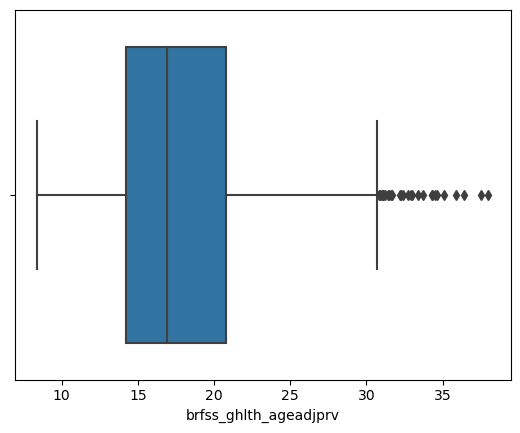

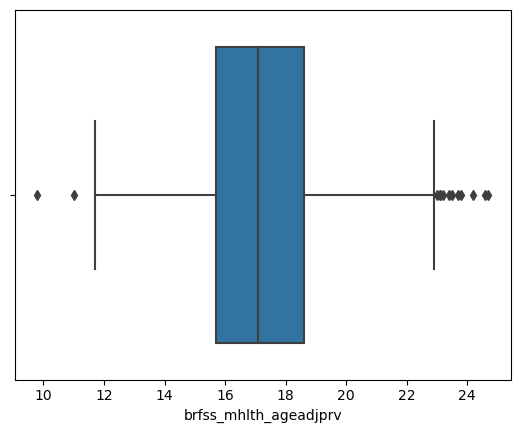

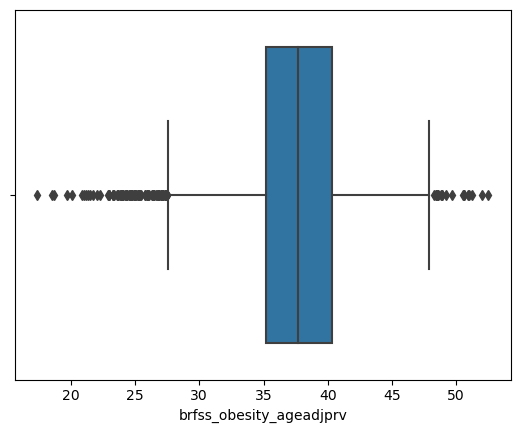

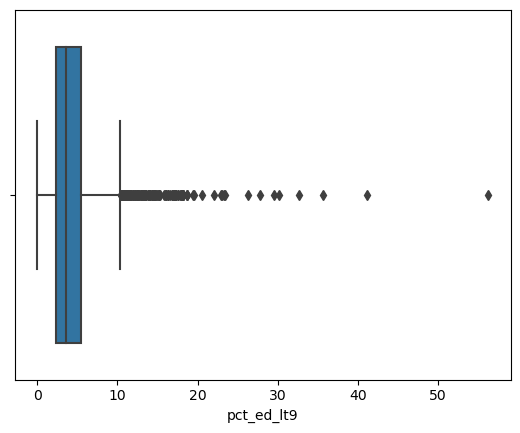

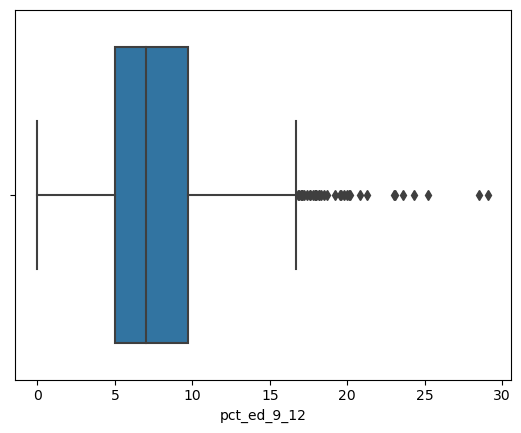

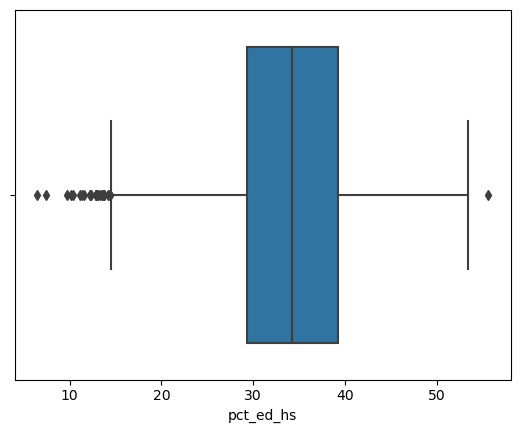

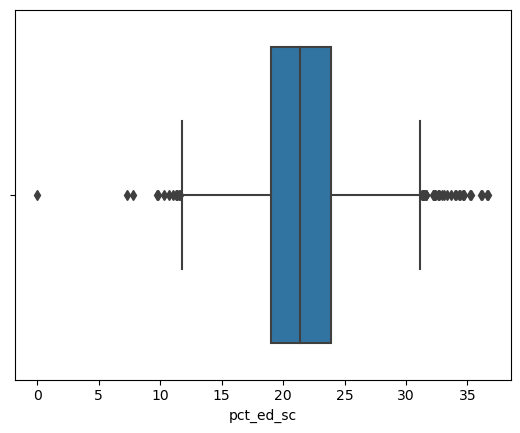

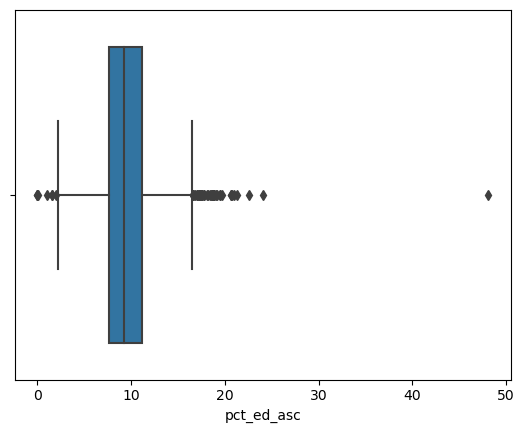

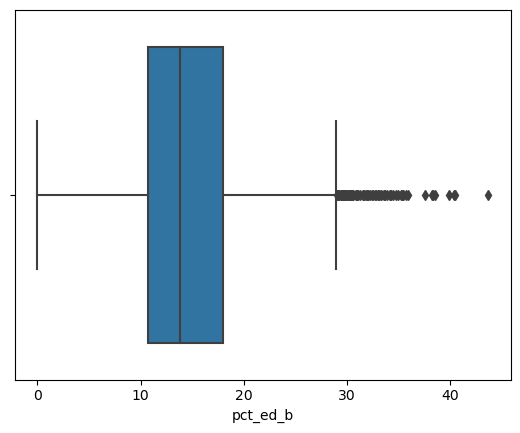

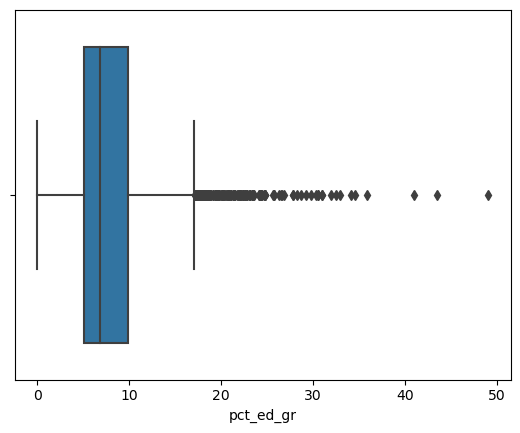

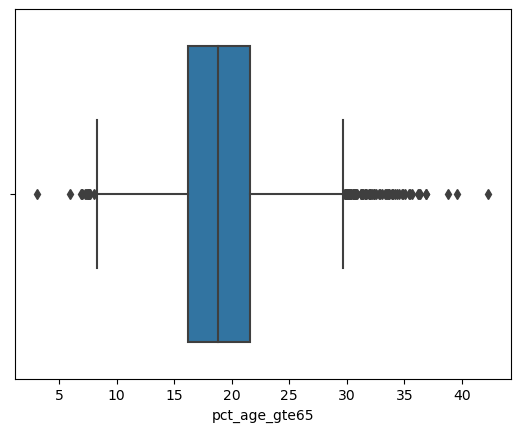

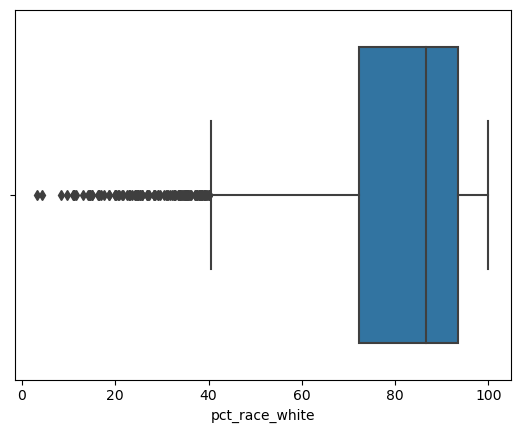

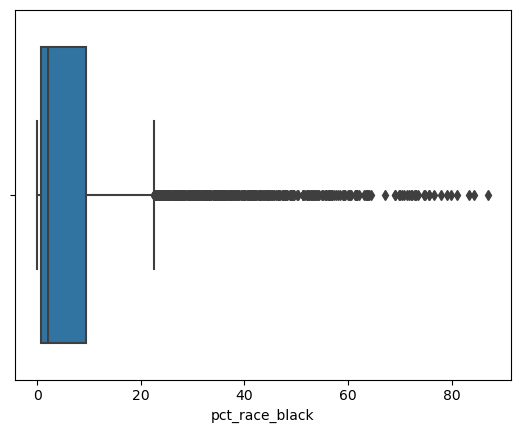

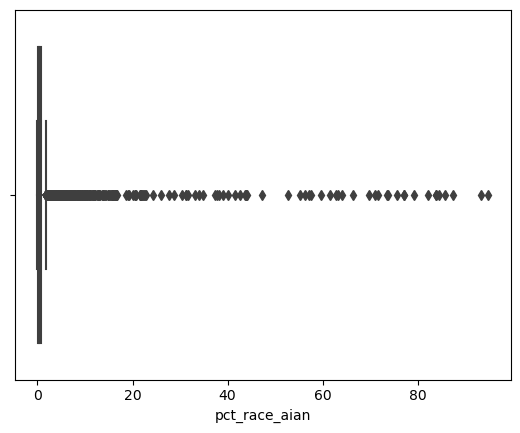

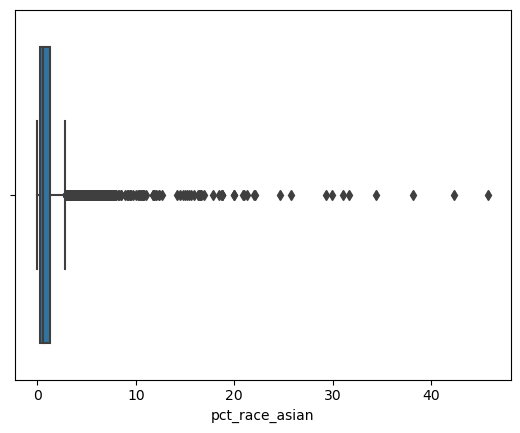

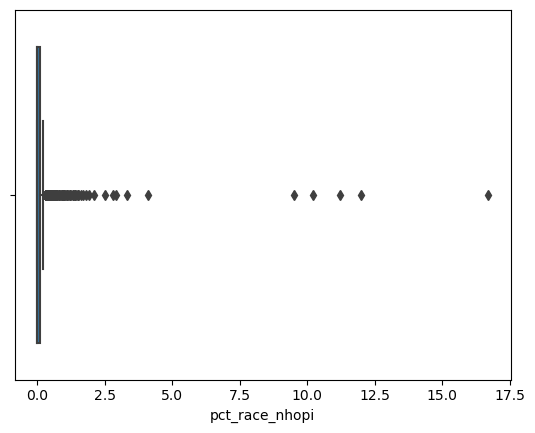

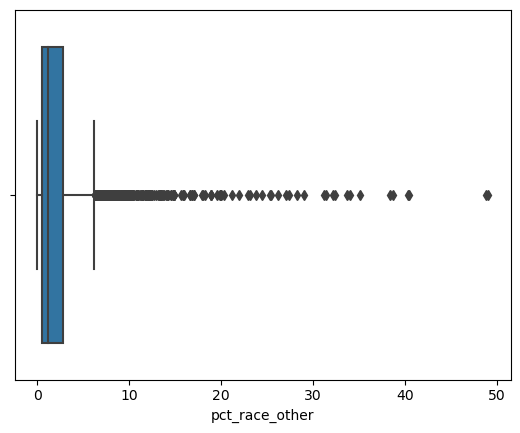

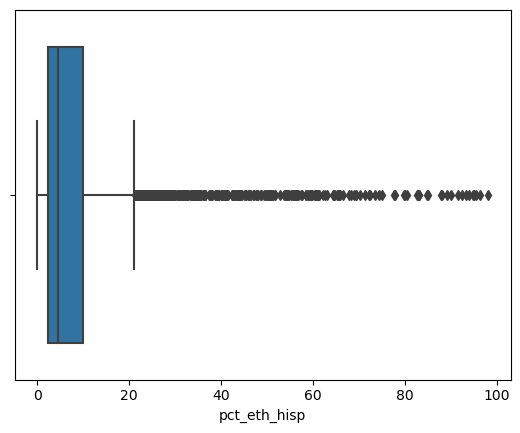

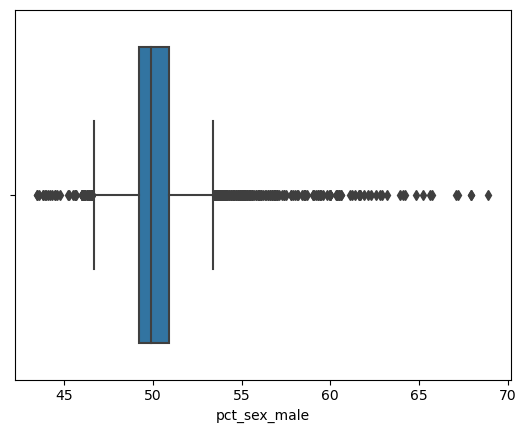

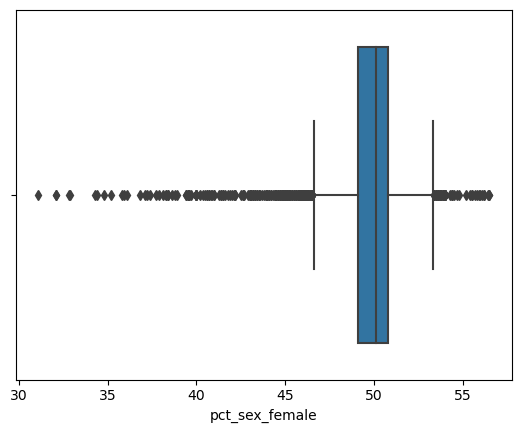

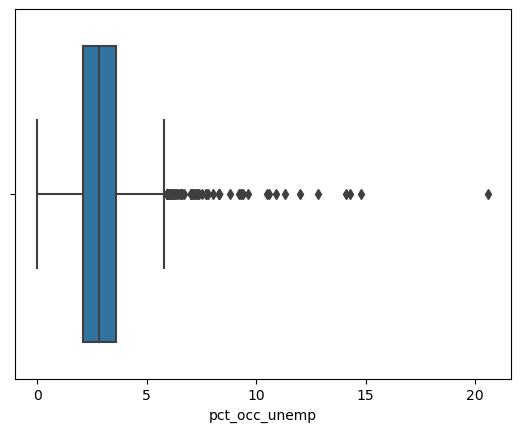

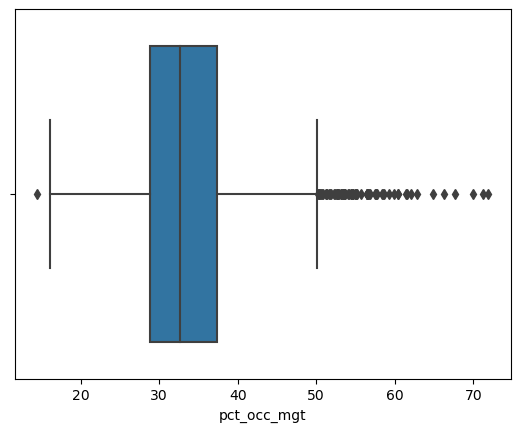

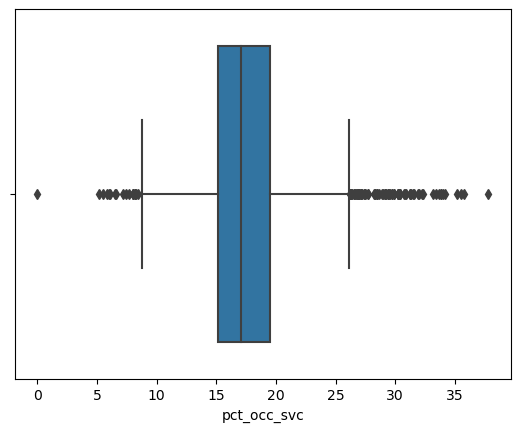

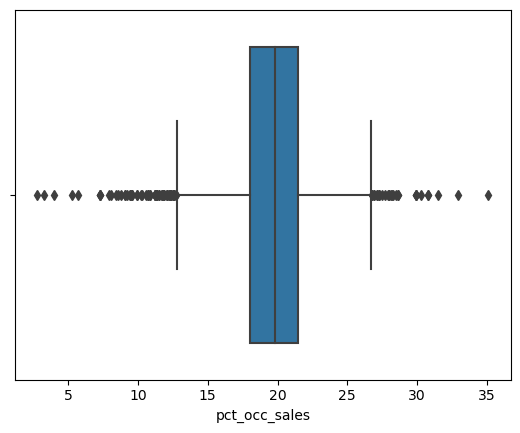

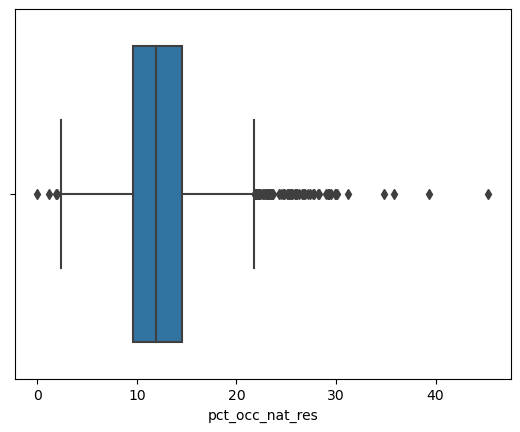

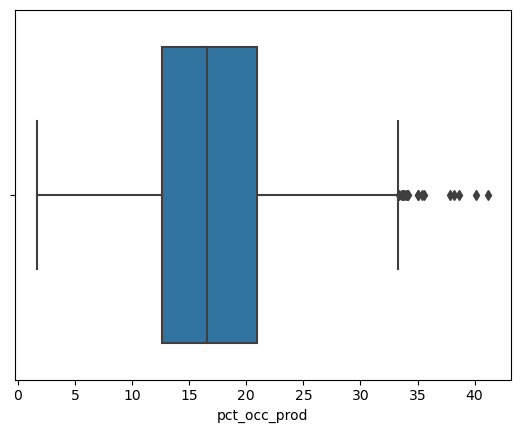

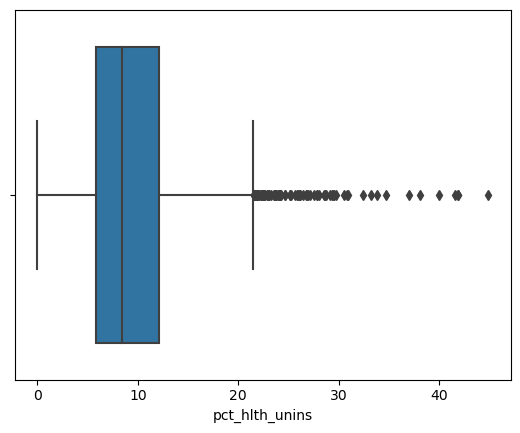

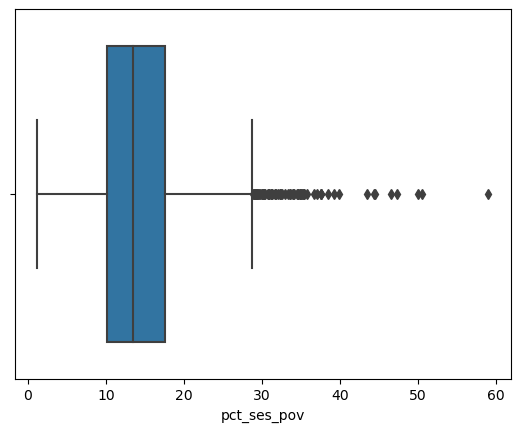

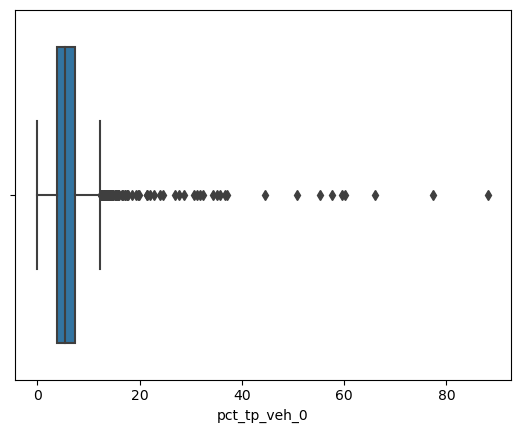

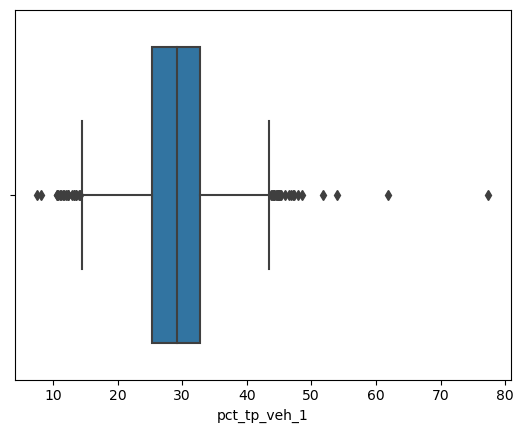

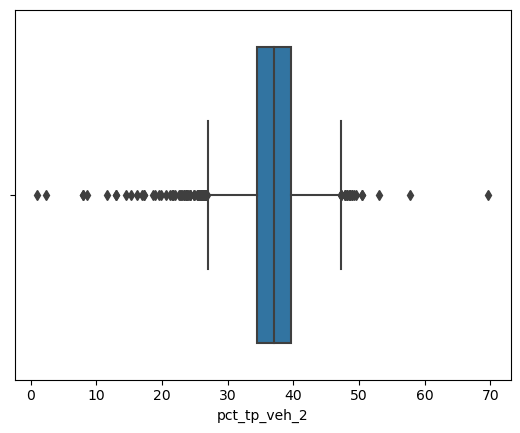

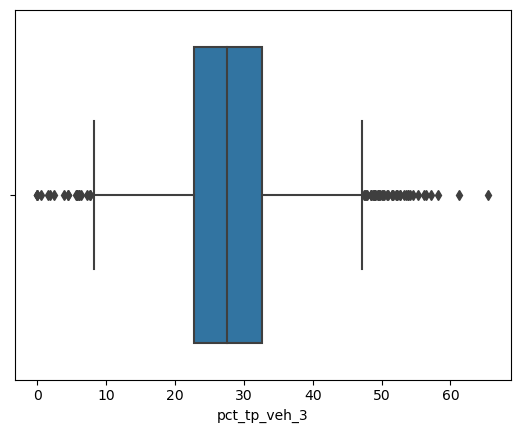

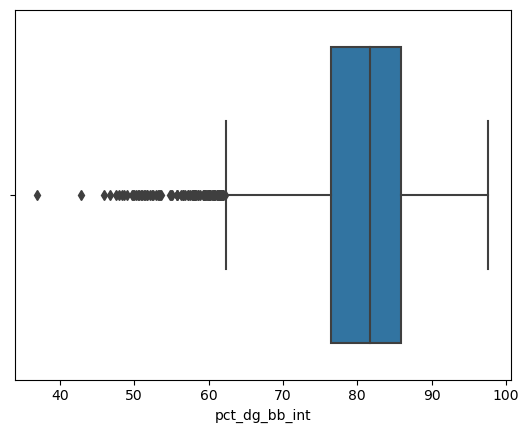

In [15]:
#box plots for all feautres seaborn
for i in df[features]:
    sns.boxplot(x=df[i])
    plt.show()

## Key Insight
1. Diabetes prevalence is highly correlated with general health. Due to the linear relationship, RQ 2 will be dropped. 

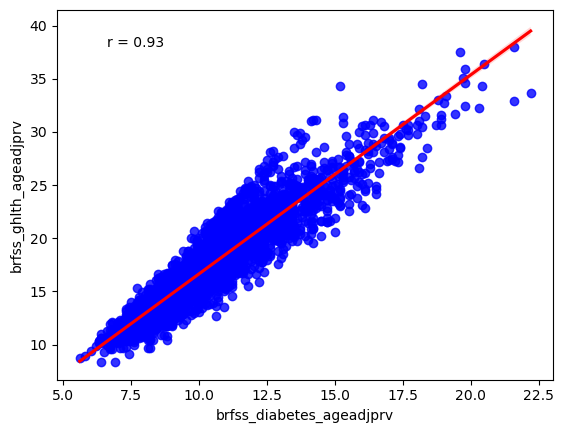

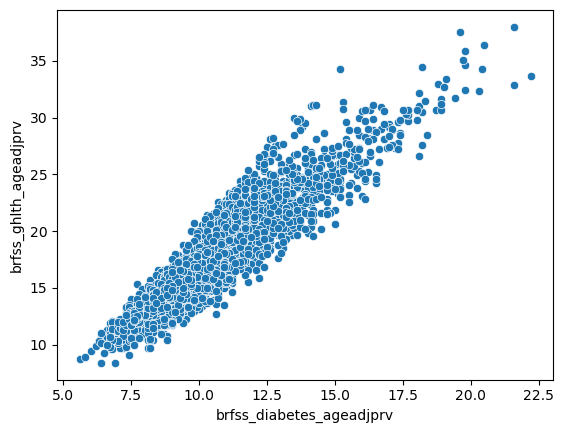

In [16]:
sns.regplot(data=df, x="brfss_diabetes_ageadjprv", y="brfss_ghlth_ageadjprv", line_kws={"color": "red"}, scatter_kws={"color": "blue"}, ci=95)
plt.text(0.1, 0.9, f"r = {round(df['brfss_diabetes_ageadjprv'].corr(df['brfss_ghlth_ageadjprv']), 2)}", transform=plt.gca().transAxes)
plt.show()
sns.scatterplot(data=df, x="brfss_diabetes_ageadjprv", y="brfss_ghlth_ageadjprv")
plt.show()